import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import matplotlib

import pandas as pd
import re
import jieba
from pprint import pprint

import os
import sys
sys.stderr = open(os.devnull, "w")  # silence stderr
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
sys.stderr = sys.__stderr__  # unsilence stderr

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # 3.3.x 版本之前请使用 import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangbowen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<>:1: DeprecationWarning: invalid escape sequence \S
<>:1: DeprecationWarning: invalid escape sequence \S
/var/folders/d1/q46wkhss5rd_g6bkyzhn33q00000gn/T/ipykernel_45810/4273963788.py:1: DeprecationWarning: invalid escape sequence \S
  TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 33
total tokens: 43866
<10> LL/token: -8.9646
<20> LL/token: -8.49034
<30> LL/token: -8.30144
<40> LL/token: -8.19022

0	5	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn mobil court elonmusk artificialintellig german rule 
1	5	system driver drive assist semi road car gm year everi includ hand turn releas travel vehicl light av good data 
2	5	musk elon amp tsla vehicl drive car today kill lidar 

<310> LL/token: -7.72096
<320> LL/token: -7.72524
<330> LL/token: -7.72231
<340> LL/token: -7.7245

0	5	robot ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil elonmusk artificialintellig electricvehicl 
1	5	system drive assist semi driver work develop cruis gm good news releas light talk great ada expect close free recent 
2	5	amp tsla musk elon compani claim kill live market lidar save product death believ tslaq engin start camera uber run 
3	5	softwar mile accid data everi waymo drive million updat court includ day potenti 10 ban 000 germani world turn learn 
4	5	drive full car capabl stop advanc problem end custom automot 100 limit issu tesla give acceler anoth time buy consid 
5	5	crash vehicl safeti semi highway investig autom fatal traffic truck design oper lot ntsb die involv nhtsa part caus plane 
6	5	car road fulli human year test drive safer realli term respons long video back func

<610> LL/token: -7.65677
<620> LL/token: -7.65107
<630> LL/token: -7.65268
<640> LL/token: -7.64977

0	5	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar technolog transport machinelearn travel mobil elonmusk artificialintellig electricvehicl 
1	5	system drive assist cruis driver work semi develop stop gm technolog traffic news good light talk great ada av releas 
2	5	amp tsla musk elon claim market kill public live day lidar save compani improv death product tslaq engin camera 2019 
3	5	softwar mile year data futur everi waymo term million mislead court includ 000 potenti advertis 4 german accid ban germani 
4	5	drive full peopl capabl call advanc mani problem issu understand part custom run limit give fact comput offer consid someth 
5	5	crash vehicl safeti semi report video highway investig compani autom accid fatal engag consum 1 truck design oper lot ntsb 
6	5	road car human fulli test realli safer turn respons long back func

<910> LL/token: -7.64524
<920> LL/token: -7.64521
<930> LL/token: -7.64511
<940> LL/token: -7.6501

0	5	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless technolog iot 5g smartciti driverlesscar transport machinelearn travel mobil elonmusk artificialintellig electricvehicl 
1	5	system drive cruis develop semi stop danger gm news releas assist light talk latest compar av great ada technolog close 
2	5	amp tsla musk elon claim market compani vehicl kill public live lidar save death product tslaq engin camera label experi 
3	5	softwar year mile data everi 2 waymo 1 term updat million court includ mislead 000 potenti advertis 4 german ban 
4	5	drive full peopl capabl call advanc mani problem ap understand issu part custom limit fact give option comput offer sign 
5	5	crash safeti semi accid report video highway investig model autom fatal system engag consum truck design ntsb oper involv nhtsa 
6	5	road human car fulli work test realli safer futur turn long alreadi l

<60> LL/token: -7.66638
<70> LL/token: -7.65113
<80> LL/token: -7.64024
<90> LL/token: -7.62247

0	25	drive driver vehicl car featur fulli make fsd system full assist human softwar requir safeti peopl mile current tsla compani 
1	25	car system robot crash ai vehicl startup semi amp level selfdriv tech drive selfdrivingcar technolog autonomousvehicl driverless 2 model iot 

<100> LL/token: -7.62323
<110> LL/token: -7.61271
<120> LL/token: -7.59891
<130> LL/token: -7.59733
<140> LL/token: -7.59217

0	25	drive driver car system fulli featur vehicl make fsd full assist time road human softwar capabl requir mile current compani 
1	25	car vehicl robot crash ai startup semi amp drive level selfdriv tech system selfdrivingcar technolog autonomousvehicl driverless 2 musk 3 

<150> LL/token: -7.59212
<160> LL/token: -7.5873
<170> LL/token: -7.57618
<180> LL/token: -7.57675
<190> LL/token: -7.57581

0	25	drive driver system fulli vehicl car featur make fsd full assist time human capabl requir sof

<70> LL/token: -7.77287
<80> LL/token: -7.75435
<90> LL/token: -7.72642

0	16.66667	drive system amp semi level driver 2 tsla make model featur vehicl time fulli 3 requir current human wheel cruis 
1	16.66667	drive car vehicl fulli peopl musk elon year driver full softwar accid road call mode test highway kill make clear 
2	16.66667	driver robot car ai startup crash selfdriv fsd tech selfdrivingcar technolog autonomousvehicl driverless assist full iot 5g smartciti safeti driverlesscar 

<100> LL/token: -7.70522
<110> LL/token: -7.68042
<120> LL/token: -7.66438
<130> LL/token: -7.65329
<140> LL/token: -7.64555

0	16.66667	system driver drive featur semi amp level make tsla 2 time model 3 requir current fulli attent human wheel cruis 
1	16.66667	drive vehicl car fulli peopl musk elon softwar year full call accid mode test highway kill develop market clear waymo 
2	16.66667	car robot crash ai startup selfdriv tech driver selfdrivingcar technolog autonomousvehicl fsd driverless vehicl safe

<810> LL/token: -7.54712
<820> LL/token: -7.54547
<830> LL/token: -7.5457
<840> LL/token: -7.54547

0	16.66667	driver system fulli featur make semi amp level 3 assist 2 tsla time model human capabl requir current attent wheel 
1	16.66667	drive car full peopl musk elon softwar year call mode claim market futur develop kill stop thing public safe vehicl 
2	16.66667	vehicl robot crash ai startup fsd selfdriv road tech selfdrivingcar technolog autonomousvehicl driverless safeti iot 5g smartciti driverlesscar mile accid 

<850> LL/token: -7.54744
<860> LL/token: -7.54352
<870> LL/token: -7.5421
<880> LL/token: -7.54077
<890> LL/token: -7.54458

0	16.66667	driver system fulli featur make semi amp level 3 assist 2 tsla time model human capabl requir current attent wheel 
1	16.66667	drive car full peopl musk elon softwar year call mode claim market futur vehicl develop kill stop thing compani safe 
2	16.66667	vehicl robot crash ai startup fsd selfdriv road tech selfdrivingcar technolog autonom

<460> LL/token: -7.58165
<470> LL/token: -7.58297
<480> LL/token: -7.58102
<490> LL/token: -7.58272

0	12.5	drive amp level 3 2 tsla full musk elon capabl year mile accid 5 1 claim market report data everi 
1	12.5	driver vehicl system featur crash semi peopl assist safeti model human requir call cruis control lane highway kill investig activ 
2	12.5	drive car fulli fsd make road time softwar current compani attent wheel full work mode hand pay clear pilot advanc 
3	12.5	robot car ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless iot 5g smartciti driverlesscar test transport futur machinelearn owner stop 

<500> LL/token: -7.58604
<510> LL/token: -7.5879
<520> LL/token: -7.58502
<530> LL/token: -7.58255
<540> LL/token: -7.59238

0	12.5	drive amp level 3 2 tsla musk elon full capabl year mile accid 5 1 market report data claim everi 
1	12.5	driver vehicl system featur crash semi peopl assist safeti model human requir call cruis control lane highway investig ki

<60> LL/token: -7.86793
<70> LL/token: -7.83801
<80> LL/token: -7.79453
<90> LL/token: -7.76124

0	10	driver system fulli time assist drive attent human wheel cruis control work vehicl hand pay pilot thing clear peopl fsd 
1	10	car drive amp semi fsd safeti softwar system tsla report model beta auto mode today danger gm updat consum news 
2	10	robot ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless crash road iot 5g smartciti 3 driverlesscar video transport model machinelearn 
3	10	drive full level 2 musk elon year peopl call 5 test claim market state term live good road autonomi lidar 
4	10	vehicl featur car driver make mile current compani requir accid 1 crash data lane investig drive activ everi supervis chang 

<100> LL/token: -7.72542
<110> LL/token: -7.71432
<120> LL/token: -7.71113
<130> LL/token: -7.69767
<140> LL/token: -7.69501

0	10	driver fulli system assist time attent wheel cruis control work peopl hand make vehicl pay capabl clear pilot stop t

<610> LL/token: -7.57524
<620> LL/token: -7.58576
<630> LL/token: -7.58266
<640> LL/token: -7.58161

0	10	driver system fulli peopl assist time human capabl attent wheel cruis control work hand mode pay clear pilot stop thing 
1	10	fsd semi amp system tsla safeti softwar drive test highway develop beta compani public danger gm model updat news consum 
2	10	robot crash ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless iot 5g smartciti driverlesscar model 3 report transport video owner 
3	10	drive full level 2 musk elon year call 5 claim market 3 state autonomi day term lidar mislead court back 
4	10	car vehicl featur make road requir mile current accid 1 data lane activ everi supervis chang waymo futur safe safer 

<650> LL/token: -7.57488
<660> LL/token: -7.57847
<670> LL/token: -7.57942
<680> LL/token: -7.57939
<690> LL/token: -7.57453

0	10	driver fulli system peopl assist time human capabl attent wheel cruis control work mode hand pay clear pilot auto sto

<110> LL/token: -7.72637
<120> LL/token: -7.70706
<130> LL/token: -7.69457
<140> LL/token: -7.69139

0	8.33333	robot ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn test waymo owner travel mobil 
1	8.33333	driver fulli featur vehicl make car assist time human requir current attent wheel hand pay activ state clear supervis safe 
2	8.33333	car crash vehicl safeti road mile accid data video report 1 year everi investig auto beta public safer fatal updat 
3	8.33333	fsd amp peopl tsla musk elon drive control work claim kill today realli full market turn live good lidar problem 
4	8.33333	drive system semi model cruis compani mode capabl call develop lane pilot chang full gm actual term point death oper 
5	8.33333	drive level 2 3 softwar full 5 stop road autonomi consum releas mislead long improv court includ back alreadi artificialintellig 

<150> LL/token: -7.68168
<160> LL/token: -7.67973
<170> LL/token: -

<560> LL/token: -7.59644
<570> LL/token: -7.59551
<580> LL/token: -7.59686
<590> LL/token: -7.59892

0	8.33333	robot ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless iot road 5g smartciti driverlesscar test video transport owner machinelearn waymo 
1	8.33333	driver vehicl fulli featur make car assist time human requir current attent wheel hand pay activ state supervis clear safe 
2	8.33333	car crash vehicl safeti mile accid 1 report data highway investig everi auto public road safer fatal traffic updat engag 
3	8.33333	fsd amp peopl tsla musk elon control work claim futur kill today realli mani danger turn live good lidar save 
4	8.33333	system drive semi model capabl compani call cruis lane develop beta pilot chang mode advanc gm term actual problem news 
5	8.33333	drive full level 3 2 softwar year 5 market stop thing autonomi mislead long court includ back end potenti advertis 

<600> LL/token: -7.60363
<610> LL/token: -7.60212
<620> LL/token: -7.59899
<6

Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 33
total tokens: 43866
<10> LL/token: -8.78677
<20> LL/token: -8.37899
<30> LL/token: -8.17877
<40> LL/token: -8.05533

0	7.14286	drive driver vehicl amp time assist system fsd elon car call develop everi musk respons fulli readi product public make 
1	7.14286	drive semi model 3 system driver cruis crash vehicl car video stop gm mode hand kill news highway light lot 
2	7.14286	car drive level system tsla fulli 2 year 5 market human autom musk fsd live consum million turn ev capabl 
3	7.14286	drive vehicl mile peopl car data accid 1 waymo pilot semi owner fulli auto road world 2 futur end function 
4	7.14286	featur full drive attent requir current wheel driver vehicl activ supervis peopl compani elon system test steer actual pay mislead 
5	7.14286	car make driver fulli claim lane control softwar mani chang fsd advanc vehicl lidar state capabl believ compani work today 
6	7.14286	robot ai startup selfdriv tech se

<410> LL/token: -7.64466
<420> LL/token: -7.64382
<430> LL/token: -7.6483
<440> LL/token: -7.6434

0	7.14286	vehicl amp tsla musk safeti elon call claim everi state clear safe public respons releas issu readi death product 10 
1	7.14286	system semi 3 crash model cruis drive mode highway kill stop develop danger gm turn traffic truck news lot light 
2	7.14286	car drive level 2 year 5 market report investig autom today autonomi fatal live consum save point alreadi ntsb involv 
3	7.14286	drive car peopl road mile 1 data accid pilot auto waymo thing mani safer good actual million engag world long 
4	7.14286	driver fulli featur make assist time human requir current attent wheel control hand vehicl pay activ supervis advanc realli term 
5	7.14286	drive full fsd capabl softwar compani work test lane futur owner chang beta day lidar believ oper 000 improv function 
6	7.14286	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl technolog driverless iot 5g smartciti driverlesscar crash

<810> LL/token: -7.62549
<820> LL/token: -7.62428
<830> LL/token: -7.62747
<840> LL/token: -7.62327

0	7.14286	vehicl amp tsla musk safeti elon call compani claim state clear public danger safe releas issu readi death product nhtsa 
1	7.14286	system semi crash 3 model cruis drive mode highway develop kill investig stop gm fatal traffic news truck design alreadi 
2	7.14286	drive car level 2 year 5 market report autom autonomi consum live back end today navig save point complet 4 
3	7.14286	car road peopl mile accid 1 data futur everi pilot auto thing realli mani safer drive turn engag million problem 
4	7.14286	driver fulli featur make assist time vehicl human requir current attent wheel control hand pay activ supervis advanc term respons 
5	7.14286	drive full fsd capabl softwar work test lane owner chang beta day lidar improv ev believ 000 10 function learn 
6	7.14286	robot ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless iot 5g smartciti driverlesscar tran

<210> LL/token: -7.72918
<220> LL/token: -7.72388
<230> LL/token: -7.73357
<240> LL/token: -7.73904

0	6.25	semi vehicl car safeti mile cruis accid 1 report pay everi realli mani mode gm safer human engag steer truck 
1	6.25	vehicl peopl car fulli wheel human hand kill owner call thing live make problem save ev readi lot complet talk 
2	6.25	drive level full 2 musk elon 3 year 5 claim pilot auto autonomi day lidar call engin learn part start 
3	6.25	driver system featur make assist capabl requir current compani attent full activ clear supervis advanc term mislead court oper potenti 
4	6.25	drive fsd amp tsla beta data updat releas design improv includ ntsb regul market case happen electr industri caus futur 
5	6.25	drive car road fulli time control work softwar test waymo safe danger good consum respons actual point long believ watch 
6	6.25	crash car model lane develop highway investig chang stop autom today traffic vehicl news back end death nhtsa 3 world 
7	6.25	robot ai startup sel

<560> LL/token: -7.67115
<570> LL/token: -7.66455
<580> LL/token: -7.66706
<590> LL/token: -7.65816

0	6.25	system semi safeti mile cruis accid 1 report data develop everi mani gm safer engag million truck alreadi 000 function 
1	6.25	vehicl fulli peopl time human wheel work hand kill thing turn live actual save readi lot talk complet understand differ 
2	6.25	drive level 2 musk elon year call 5 claim auto pilot public market autonomi day lidar read 4 3 engin 
3	6.25	driver featur full make system assist capabl requir current attent pay activ state clear supervis autom advanc term mislead court 
4	6.25	fsd amp tsla drive softwar futur beta updat releas world design believ death product regul case electr learn industri happen 
5	6.25	drive car road control mode test waymo safe realli danger fulli good consum respons long watch latest point put run 
6	6.25	crash vehicl model 3 car compani lane highway investig chang stop fatal traffic news back end oper navig ntsb light 
7	6.25	robot ai 

<910> LL/token: -7.64133
<920> LL/token: -7.63753
<930> LL/token: -7.63391
<940> LL/token: -7.62821

0	6.25	system semi safeti mile accid cruis 1 report data develop everi gm safer engag million truck improv alreadi 000 10 
1	6.25	vehicl fulli peopl time human wheel work hand kill thing mani turn live actual owner respons problem save steer readi 
2	6.25	drive level full 2 musk elon year call 5 market claim pilot auto public autonomi day lidar read 4 part 
3	6.25	driver featur make system assist capabl requir current attent pay activ supervis state autom advanc clear term full mislead court 
4	6.25	drive fsd amp tsla softwar futur beta updat releas design world death believ product regul electr industri real custom question 
5	6.25	car drive road fulli control test mode waymo safe today realli danger good point long consum watch latest great put 
6	6.25	crash vehicl 3 model compani highway investig lane chang stop fatal traffic video ev news semi end oper ntsb light 
7	6.25	robot ai st

<260> LL/token: -7.69663
<270> LL/token: -7.69262
<280> LL/token: -7.68145
<290> LL/token: -7.69474

0	5.55556	system crash semi safeti capabl compani mode report highway owner state design oper driver ntsb involv die engag ada limit 
1	5.55556	level fulli 2 peopl time year attent drive 5 pay pilot thing mani clear issu readi point 10 case read 
2	5.55556	human mile car cruis accid data 1 develop everi auto chang waymo stop gm safer million problem world ev 000 
3	5.55556	vehicl 3 model investig public autom fatal traffic lidar death product nhtsa regul engin latest camera electr learn automot question 
4	5.55556	drive car softwar lane work turn good updat releas includ navig talk function brake run hardwar comput automat love sign 
5	5.55556	drive road car call test video futur realli day danger news long back lot watch great anoth tslaq 100 uber 
6	5.55556	driver featur make assist vehicl requir current fulli wheel control hand activ supervis safe advanc respons steer ap custom enabl

<560> LL/token: -7.66212
<570> LL/token: -7.65754
<580> LL/token: -7.66555
<590> LL/token: -7.66081

0	5.55556	system crash semi safeti compani report highway investig capabl fatal actual truck design oper ntsb involv die electr caus consum 
1	5.55556	level fulli peopl 2 time 5 state clear year pilot car thing autonomi mani issu readi point 10 complet differ 
2	5.55556	human mile accid data 1 cruis develop everi chang waymo stop owner today gm safer million year ev alreadi 000 
3	5.55556	vehicl 3 model mode auto public danger autom lidar regul nhtsa latest engin question industri automot traffic high av camera 
4	5.55556	drive car softwar work lane updat improv end navig function releas run limit happen hardwar option comput automat continu power 
5	5.55556	drive road car call test video futur realli day news back lot talk watch great anoth plane uber love seat 
6	5.55556	driver featur make vehicl assist fulli requir current wheel control attent hand activ supervis capabl advanc respon

<860> LL/token: -7.64986
<870> LL/token: -7.64898
<880> LL/token: -7.65656
<890> LL/token: -7.651

0	5.55556	system crash semi safeti report highway investig model capabl fatal state truck oper ntsb involv nhtsa die caus electr accord 
1	5.55556	fulli level peopl 2 5 time pilot thing mani autonomi problem point issu readi end clear talk differ understand believ 
2	5.55556	human year mile cruis accid 1 data develop owner everi waymo stop gm safer engag today million world alreadi 000 
3	5.55556	vehicl 3 drive model compani auto autom traffic lidar danger ev actual regul engin latest great learn industri question automot 
4	5.55556	car drive softwar lane work chang updat releas long improv navig function put run limit design speed hardwar sinc comput 
5	5.55556	drive road car call video futur mode realli good test news back day lot watch camera anoth uber person love 
6	5.55556	driver featur vehicl make assist requir current attent wheel control hand time activ supervis pay safe advanc s

<160> LL/token: -7.78575
<170> LL/token: -7.78425
<180> LL/token: -7.77553
<190> LL/token: -7.77182

0	5	vehicl driver featur fulli make musk elon requir current video kill activ supervis safe live steer save die enabl websit 
1	5	drive vehicl capabl car wheel report data hand waymo advanc realli releas back learn compar uber turn respons sinc question 
2	5	robot ai startup selfdriv tech selfdrivingcar technolog autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig ml bigdata 
3	5	drive system fsd peopl cruis develop beta gm semi thing elonmusk talk brake ap news super emerg continu offer ada 
4	5	driver drive assist car attent control time call pay mode state mani problem mislead issu design function differ clear understand 
5	5	road human car tsla mile accid 1 highway everi safer crash day engag million world 000 10 4 tslaq year 
6	5	drive full softwar year claim pilot today term market court long includ potenti complet adve

<460> LL/token: -7.70167
<470> LL/token: -7.70148
<480> LL/token: -7.69943
<490> LL/token: -7.68811

0	5	vehicl fulli featur make elon requir current driver musk kill activ supervis safe live save steer lane brake enabl websit 
1	5	drive car data waymo advanc futur turn realli vehicl releas improv back part learn uber high sinc hardwar option expect 
2	5	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl technolog driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil elonmusk artificialintellig electricvehicl 
3	5	system drive fsd peopl cruis develop beta thing gm talk differ great ada tri lead love emerg super confus offer 
4	5	driver assist time car attent wheel control hand pay state pilot clear mani mode problem respons design issu function ap 
5	5	car road human mile accid 1 report video everi safer day engag million world alreadi 000 10 watch 4 year 
6	5	drive full capabl softwar claim market year musk term mislead court includ readi today end 

<760> LL/token: -7.67134
<770> LL/token: -7.66688
<780> LL/token: -7.67556
<790> LL/token: -7.66692

0	5	vehicl fulli featur make elon driver requir current lane kill activ supervis live steer save brake musk enabl websit automat 
1	5	drive car data futur waymo realli advanc releas improv uber turn high give sinc learn hardwar version comput continu basic 
2	5	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl technolog driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil elonmusk artificialintellig electricvehicl 
3	5	system drive fsd peopl cruis develop owner beta thing gm talk back great differ ada tri super emerg confus lead 
4	5	driver assist time attent wheel control mode hand pay state clear pilot mani car respons problem design issu function ap 
5	5	car road human mile accid report 1 everi video safer day engag million world 000 10 4 watch case real 
6	5	drive full softwar capabl musk year claim today term updat mislead court includ potenti 

<60> LL/token: -8.04742
<70> LL/token: -7.97443
<80> LL/token: -7.93108
<90> LL/token: -7.89469

0	4.54545	crash system safeti accid semi report investig vehicl state fatal public engag death ntsb involv nhtsa model danger truck anoth 
1	4.54545	car drive 3 mile data highway test chang video work human elonmusk back news 000 lot ap understand automot 100 
2	4.54545	car road peopl fulli year stop safe drive good actual updat 10 die industri real person limit tri articl 2020 
3	4.54545	technolog semi vehicl cruis model compani futur develop beta gm read watch latest learn caus start design softwar give long 
4	4.54545	fsd amp drive tsla market waymo lidar consum releas readi tslaq work autonomi engin ban product high avoid hardwar comput 
5	4.54545	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig electricvehicl ml deeplearn 
6	4.54545	featur driver make car vehicl wheel requir c


0	4.54545	crash system semi safeti vehicl accid report 1 investig public danger fatal engag oper truck ntsb involv nhtsa highway die 
1	4.54545	drive mile work test data video chang traffic news elonmusk back 000 lot ap camera 100 driven show tesla option 
2	4.54545	car road year safe realli actual good world 10 function updat real person sinc run articl tri understand 2020 anoth 
3	4.54545	model softwar compani technolog cruis futur develop stop beta semi gm releas watch latest start electr learn caus differ highway 
4	4.54545	fsd amp tsla market waymo lidar day design death product engin tslaq industri uber high hardwar label comput continu sell 
5	4.54545	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig electricvehicl radar model3 
6	4.54545	vehicl featur make driver requir car current wheel control mode lane hand activ supervis steer navig brake enabl accord automat 
7	4.

<610> LL/token: -7.69119
<620> LL/token: -7.68313
<630> LL/token: -7.67011
<640> LL/token: -7.68185

0	4.54545	crash safeti system accid vehicl 1 report semi investig fatal engag consum danger truck oper ntsb involv 4 nhtsa die 
1	4.54545	drive mile work data video test traffic back world lot 000 camera real 100 show driven tesla releas base california 
2	4.54545	car road year safe actual realli function read understand good anoth run person sinc tri learn articl possibl sign eye 
3	4.54545	model semi softwar compani technolog cruis highway 3 develop stop gm updat news latest electr watch compar version power super 
4	4.54545	fsd amp tsla beta waymo lidar 10 tslaq engin end product happen market design high industri avoid uber hardwar label 
5	4.54545	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn technolog travel mobil artificialintellig electricvehicl ml 
6	4.54545	vehicl featur make driver requir curren

<870> LL/token: -7.682
<880> LL/token: -7.68172
<890> LL/token: -7.67851

0	4.54545	crash vehicl safeti semi accid 1 report system investig video fatal consum engag truck ntsb involv nhtsa oper die question 
1	4.54545	drive mile mode test data owner work traffic world 000 lot camera 100 show driven real tesla love billion recent 
2	4.54545	car road safe realli actual read watch year understand anoth automot work run person close articl 2020 function taxi sinc 
3	4.54545	model softwar 3 compani semi cruis highway develop stop gm updat news technolog latest electr releas compar version super power 
4	4.54545	fsd amp tsla beta waymo lidar public end death product 10 tslaq engin happen industri uber high hardwar label sell 
5	4.54545	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar technolog transport machinelearn travel mobil elonmusk artificialintellig electricvehicl 
6	4.54545	vehicl featur make driver requir current wheel control 

<110> LL/token: -7.895
<120> LL/token: -7.8811
<130> LL/token: -7.86617
<140> LL/token: -7.85222

0	4.16667	drive system cruis control lane highway develop chang stop gm light mislead learn av limit sinc close option citi talk 
1	4.16667	driver fulli drive assist attent call pilot danger autom problem design improv ap engin custom car electr plane fact expect 
2	4.16667	drive full owner market clear realli today term autonomi includ advertis court potenti german complet ban tslaq start case respons 
3	4.16667	driver featur make vehicl requir capabl time current wheel mode hand activ supervis mani traffic engag steer readi 000 brake 
4	4.16667	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar technolog transport machinelearn travel mobil artificialintellig label electricvehicl 
5	4.16667	system crash semi model compani safeti technolog investig fatal news oper ntsb involv nhtsa industri 1 latest hit automak govern 
6	4.16667	peopl m

<360> LL/token: -7.72326
<370> LL/token: -7.71592
<380> LL/token: -7.7095
<390> LL/token: -7.7127

0	4.16667	drive system cruis control lane develop highway chang stop mani gm traffic news navig light talk latest anoth learn limit 
1	4.16667	driver fulli assist call attent pay pilot autom danger state problem respons design ap plane fact time reason monitor realli 
2	4.16667	drive full capabl market owner today term mislead includ court potenti advertis german ban germani end rule robotaxi confus complet 
3	4.16667	vehicl featur driver make requir current time wheel hand activ supervis clear steer mode readi read brake enabl 100 websit 
4	4.16667	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn technolog travel mobil elonmusk artificialintellig electricvehicl 
5	4.16667	system crash semi safeti 1 model investig compani fatal 000 ntsb nhtsa oper involv avoid technolog hit accord automak govern 
6	4.16667	vehi

<610> LL/token: -7.70656
<620> LL/token: -7.70451
<630> LL/token: -7.70448
<640> LL/token: -7.70054

0	4.16667	drive cruis control lane highway develop chang stop system gm news traffic navig light latest advanc learn limit speed super 
1	4.16667	driver fulli assist attent pay state clear time pilot autom danger call realli problem respons design ap understand plane fact 
2	4.16667	drive full capabl market owner today term call mislead court includ potenti german ban advertis germani option rule sell confus 
3	4.16667	vehicl featur driver make requir current wheel time hand activ supervis steer readi read brake 100 enabl complet warn articl 
4	4.16667	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport technolog machinelearn travel mobil artificialintellig elonmusk electricvehicl 
5	4.16667	system crash semi safeti model investig compani fatal oper ntsb involv nhtsa electr caus report hit automak govern march feder 
6	4.166

<860> LL/token: -7.70921
<870> LL/token: -7.69466
<880> LL/token: -7.69307
<890> LL/token: -7.69945

0	4.16667	drive system cruis control lane highway develop auto chang stop gm traffic updat news navig light latest speed super free 
1	4.16667	driver fulli assist attent call pay time clear pilot realli danger state actual problem respons advanc ap understand readi plane 
2	4.16667	drive full capabl market owner term mislead court potenti advertis german ban includ germani case sinc option call rule part 
3	4.16667	vehicl featur driver make requir current wheel hand activ supervis time steer read brake enabl websit complet 100 articl warn 
4	4.16667	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar technolog transport machinelearn travel mobil elonmusk artificialintellig electricvehicl 
5	4.16667	system crash semi safeti model investig autom compani fatal truck ntsb oper involv nhtsa electr caus design hit automak govern 
6	4.16667	

<110> LL/token: -7.88305
<120> LL/token: -7.87427
<130> LL/token: -7.86424
<140> LL/token: -7.85679

0	3.84615	drive market claim mislead issu court believ potenti advertis german fulli function germani ban consum ada plane word time lead 
1	3.84615	road futur kill softwar pilot auto safer live lidar save includ death happen camera million real put rule hardwar comput 
2	3.84615	system assist drive capabl cruis control hand develop public gm respons problem navig nhtsa state industri give super sell perfect 
3	3.84615	system semi safeti driver drive investig danger autom call design caus car compar av realli polic california govern label standard 
4	3.84615	amp tsla model 3 mile compani truck highway 000 watch latest read electr automot automak tslaq citi month someth manufactur 
5	3.84615	car video lane chang safe owner softwar traffic updat world engin limit anoth highway person avoid day custom hit 100 
6	3.84615	crash vehicl accid 1 data report waymo everi stop fatal engag involv a

<360> LL/token: -7.76412
<370> LL/token: -7.763
<380> LL/token: -7.76139
<390> LL/token: -7.77632

0	3.84615	drive full call claim market term problem mislead issu court potenti function advertis ban believ germani german state plane word 
1	3.84615	road futur kill pilot safer vehicl lidar save live includ death alreadi camera day question put comput hardwar experi taxi 
2	3.84615	drive vehicl technolog cruis control hand develop safe gm assist public respons capabl industri give alway super emerg continu free 
3	3.84615	system semi safeti driver assist capabl autom danger advanc auto design caus automot news av investig polic ada standard park 
4	3.84615	amp 3 tsla model watch tslaq read latest 000 electr compani highway label citi month manufactur model3 automak fail china 
5	3.84615	car softwar video lane owner stop chang traffic updat navig world engin learn anoth 100 avoid limit version highway custom 
6	3.84615	crash mile accid 1 report data everi waymo fatal engag million truck 

<610> LL/token: -7.71574
<620> LL/token: -7.71331
<630> LL/token: -7.71308
<640> LL/token: -7.72071

0	3.84615	drive full capabl call claim market term problem mislead court includ issu potenti advertis german ban germani custom rule sell 
1	3.84615	road car futur kill pilot auto live day safer lidar save vehicl alreadi death camera question put hardwar comput experi 
2	3.84615	drive cruis control technolog develop safe danger gm public respons industri compar give lead super free made head offer consid 
3	3.84615	system driver semi assist safeti autom advanc design news caus ada automot av plane polic monitor california confus regul park 
4	3.84615	amp 3 tsla model compani ev product tslaq electr latest label automak love watch buy month train model3 china fail 
5	3.84615	softwar video car lane highway owner stop chang traffic updat world navig light anoth limit learn speed avoid version engin 
6	3.84615	crash mile accid 1 data report investig everi fatal turn engag million truck waym

<860> LL/token: -7.69659
<870> LL/token: -7.69839
<880> LL/token: -7.69401
<890> LL/token: -7.68804

0	3.84615	drive full capabl call claim market term problem mislead court includ potenti advertis function german ban germani issu custom rule 
1	3.84615	road car futur kill pilot auto safer live day lidar save alreadi death watch million camera put comput taxi experi 
2	3.84615	drive technolog cruis control develop public safe danger gm respons industri compar super basic free offer head consid gt true 
3	3.84615	system driver assist semi autom advanc news design regul caus ada av polic california govern automot monitor confus standard park 
4	3.84615	amp 3 tsla model compani ev product tslaq electr label automak love power buy manufactur model3 fail china sensor latest 
5	3.84615	car softwar lane video highway owner chang stop traffic updat world navig light engin learn limit speed give version sign 
6	3.84615	crash safeti mile accid 1 data report investig everi waymo fatal consum enga

<110> LL/token: -7.90813
<120> LL/token: -7.88512
<130> LL/token: -7.88043
<140> LL/token: -7.87518

0	3.57143	amp musk tsla elon compani claim ntsb regul nhtsa great ev public tesla tslaq label articl ceo continu team discuss 
1	3.57143	drive 2 full human autom clear court oper light learn market germani accord speed close hardwar lead rule person comput 
2	3.57143	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig technolog electricvehicl deeplearn 
3	3.57143	featur make vehicl driver requir current assist wheel hand activ supervis state steer navig brake car enabl websit warn manual 
4	3.57143	driver time fulli crash attent control video pay term engag die 100 polic game monitor alway mode blame exampl lie 
5	3.57143	futur technolog owner kill drive day lidar save updat mani back safer case anoth today expect option issu base offer 
6	3.57143	system semi model cruis safeti 3 

<330> LL/token: -7.7588
<340> LL/token: -7.77304

0	3.57143	amp tsla musk elon compani claim elonmusk ev death nhtsa tslaq great regul label ceo continu fals team discuss summon 
1	3.57143	drive full 2 term mislead court light learn limit 10 hardwar lead rule comput wait abl 0 free sign autom 
2	3.57143	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig technolog electricvehicl ml 
3	3.57143	driver featur make assist vehicl requir current wheel hand activ supervis state steer navig enabl brake websit warn automat acceler 
4	3.57143	driver time attent crash control pay fulli clear mode video respons readi die understand 100 polic person hit alway monitor 
5	3.57143	technolog futur owner kill safer turn live day updat lidar save releas mani back believ anoth tri today video option 
6	3.57143	system semi model safeti crash highway investig 3 fatal truck design ntsb involv autom ele

<560> LL/token: -7.74802
<570> LL/token: -7.72861
<580> LL/token: -7.73909
<590> LL/token: -7.73357

0	3.57143	amp tsla musk elon claim compani consum death nhtsa elonmusk safeti regul tslaq ceo fals label prevent fail model3 concern 
1	3.57143	drive full term mislead court includ advertis light german learn limit speed close rule version free abl consid legal order 
2	3.57143	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil technolog artificialintellig electricvehicl ml 
3	3.57143	driver featur make assist vehicl requir current wheel hand activ state supervis steer clear navig brake enabl websit automat acceler 
4	3.57143	driver time human fulli attent control video pay respons readi die understand case person monitor 100 game citi alway exampl 
5	3.57143	peopl technolog owner kill futur today mani safer waymo turn live day lidar save releas believ camera back base sinc 
6	3.57143	crash system 

<770> LL/token: -7.73162
<780> LL/token: -7.73404
<790> LL/token: -7.73349

0	3.57143	amp tsla musk elon safeti claim consum elonmusk compani death product tslaq great market label ceo fals made model3 fail 
1	3.57143	drive full term mislead court includ potenti advertis light german ban germani learn limit rule version comput latest claim abl 
2	3.57143	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig technolog electricvehicl ml 
3	3.57143	featur make driver vehicl requir current wheel hand activ state supervis steer assist brake advanc enabl websit read warn automat 
4	3.57143	driver fulli human time assist attent control pay clear respons readi video 100 person alway monitor system eye game blame 
5	3.57143	peopl technolog kill owner futur today mani turn day live lidar save believ back die case camera part high sinc 
6	3.57143	crash system model semi 3 investig safeti high


0	3.57143	amp tsla musk elon safeti consum elonmusk death tslaq claim great market label ceo made compani product fail pleas concern 
1	3.57143	drive full term mislead court includ potenti advertis claim light german ban germani latest custom issu rule version learn comput 
2	3.57143	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn technolog travel mobil artificialintellig electricvehicl ml 
3	3.57143	featur make vehicl driver requir current wheel hand activ state supervis steer read understand brake enabl clear websit warn automat 
4	3.57143	driver assist fulli time human system attent control pay respons readi clear video 100 alway monitor eye confus blame exampl 
5	3.57143	peopl technolog futur owner kill today mani turn live day lidar save believ die case camera part sinc base high 
6	3.57143	crash model semi system compani 3 safeti highway investig fatal truck oper ntsb design involv caus polic hit aut

<160> LL/token: -7.84829
<170> LL/token: -7.84793
<180> LL/token: -7.83155
<190> LL/token: -7.82416

0	3.33333	fsd softwar system pilot auto beta thing long improv read good automot ada av limit plane speed tri emerg probabl 
1	3.33333	level 2 mile 5 1 data waymo autonomi million 3 000 4 regul news start compar driven fact today taxi 
2	3.33333	full drive musk elon claim kill term live court includ mislead potenti advertis german ban germani rule expect ceo experi 
3	3.33333	drive peopl call realli mani danger gm end engin understand part high work label team head consid 0 tsla program 
4	3.33333	accid mode lane video highway stop chang everi traffic drive full ev talk light great custom show hardwar version elonmusk 
5	3.33333	featur make capabl current car clear steer save function brake run websit warn acceler sell possibl automat someth gt dmv 
6	3.33333	system vehicl semi requir driver cruis develop activ supervis ntsb accord monitor confus exampl super creat involv lead semitrail

<360> LL/token: -7.77444
<370> LL/token: -7.79373
<380> LL/token: -7.7903
<390> LL/token: -7.79541

0	3.33333	fsd softwar pilot beta auto thing improv good read learn long automot ada av limit speed plane reason basic probabl 
1	3.33333	level 2 mile 5 1 data everi 3 waymo autonomi million video 000 10 4 start show driven 2020 taxi 
2	3.33333	full musk drive elon claim kill live term save mislead court potenti advertis german ban germani includ rule issu experi 
3	3.33333	drive peopl call mani danger realli differ engin understand run uber label team head consid big wrong high part set 
4	3.33333	drive accid mode highway lane chang stop traffic elonmusk ev talk light great custom hardwar lead video version sign give 
5	3.33333	vehicl featur make capabl current clear steer function brake enabl websit point option car automat acceler possibl sell warn gt 
6	3.33333	system semi requir cruis driver develop activ supervis gm vehicl news accord super articl monitor confus howev constant fact 

<560> LL/token: -7.77334
<570> LL/token: -7.76067
<580> LL/token: -7.76718
<590> LL/token: -7.75664

0	3.33333	fsd beta pilot auto thing softwar turn good releas long improv read automot av limit ada plane speed continu true 
1	3.33333	level 2 mile accid 5 1 data 3 everi waymo autonomi million 000 4 compar driven 10 2020 tesla taxi 
2	3.33333	drive full musk elon claim kill term live save mislead court potenti advertis includ german ban germani rule market experi 
3	3.33333	peopl drive call realli mani danger market differ engin uber start understand label team head big anyth wrong ford explain 
4	3.33333	drive lane softwar chang stop tsla traffic updat ev light talk great highway learn give hardwar elonmusk lead lot sign 
5	3.33333	vehicl featur make capabl current clear steer brake enabl websit option warn automat possibl function sell definit acceler gt dmv 
6	3.33333	system semi cruis requir drive driver develop activ supervis gm news highway super articl monitor confus fact howev 

<760> LL/token: -7.7547
<770> LL/token: -7.76154
<780> LL/token: -7.75153
<790> LL/token: -7.76045

0	3.33333	fsd test beta pilot thing good releas long improv read limit ada plane speed reason perfect probabl softwar av smart 
1	3.33333	level 2 mile accid 5 data 1 everi waymo 3 autonomi million 000 10 4 compar driven show sinc taxi 
2	3.33333	full drive tsla musk elon claim live term kill market save mislead court includ potenti german advertis ban germani rule 
3	3.33333	drive peopl call realli danger mani differ engin understand uber market high word label start team made head anyth move 
4	3.33333	drive softwar highway lane stop chang traffic updat light ev elonmusk latest great learn talk navig auto custom hardwar version 
5	3.33333	vehicl featur make capabl current requir activ clear steer state brake enabl driver websit option warn automat acceler definit gt 
6	3.33333	system drive semi cruis develop supervis gm fact news super requir monitor confus howev exampl constant tri sim

<960> LL/token: -7.73556
<970> LL/token: -7.73504
<980> LL/token: -7.75554
<990> LL/token: -7.71928

0	3.33333	fsd test beta pilot auto thing good improv releas automot read av long plane limit speed ada fact perfect basic 
1	3.33333	level 2 mile accid 5 1 data everi waymo autonomi 3 million 000 10 4 show driven sinc compar taxi 
2	3.33333	drive full musk elon claim kill term live mislead court includ save potenti advertis german ban germani rule experi ceo 
3	3.33333	peopl drive call realli danger lot differ engin understand start uber market high word sell label head team made wrong 
4	3.33333	drive softwar lane chang stop traffic updat ev light talk highway latest elonmusk navig great version give hardwar sign offer 
5	3.33333	vehicl featur make capabl requir current activ driver state supervis clear steer brake enabl websit automat emerg acceler warn howev 
6	3.33333	system drive semi cruis develop gm news super monitor ahead rate ultra confus combat supercruis hard motor gen cadil

<160> LL/token: -7.85794
<170> LL/token: -7.85024
<180> LL/token: -7.84776
<190> LL/token: -7.83512

0	3.125	crash report system investig state public compani fatal consum death vehicl involv die av uber govern feder florida move gt 
1	3.125	system drive call technolog mani problem lot design actual electr caus custom question issu avoid good engin california monitor game 
2	3.125	musk elon cruis claim futur gm compani believ advanc differ compar talk expect super ceo develop basic made fals wait 
3	3.125	tsla drive mode market develop ev watch tslaq regul real polic high fsd robotaxi recent team head month perfect vision 
4	3.125	semi system safeti human drive safer oper case part run data time train articl someth ride 10 impress googl put 
5	3.125	drive car news back camera option hardwar comput road offer radar bad 0 model3 tech standard solv pleas end sensor 
6	3.125	amp 3 model video realli data day navig ntsb hit product label love definit law automak blame latest discuss trust 


<360> LL/token: -7.77024
<370> LL/token: -7.76374
<380> LL/token: -7.76808
<390> LL/token: -7.7497

0	3.125	crash compani report investig state public fatal consum death ntsb involv die semi anoth oper regul nhtsa av question govern 
1	3.125	call drive market system mani actual problem design issu lot caus custom limit fact automot avoid electr industri confus california 
2	3.125	musk elon cruis claim develop futur advanc gm elonmusk believ differ close super compar ceo talk fals basic made expect 
3	3.125	tsla mode lidar ev good watch tslaq polic base 2019 perfect robotaxi team recent head uber vision program avail dmv 
4	3.125	system drive semi safeti human danger safer part run someth case engin number 8 predict network matter supercruis drove cadillac 
5	3.125	drive car technolog back end news camera option hardwar eye standard true move 0 comput today general trust solv model3 
6	3.125	amp 3 model video realli day navig product hit technolog automak love label discuss suggest hour

<560> LL/token: -7.75506
<570> LL/token: -7.75286
<580> LL/token: -7.757
<590> LL/token: -7.75147

0	3.125	crash safeti report investig public compani fatal state consum 1 oper ntsb involv nhtsa regul die death av question semi 
1	3.125	drive call market actual problem design issu function engin electr caus avoid danger custom california confus insur bad park found 
2	3.125	musk elon cruis claim develop gm advanc compani elonmusk differ talk compar close super basic made ceo definit fals consid 
3	3.125	tsla mode realli lidar ev tslaq watch uber high polic base 2019 waymo sell perfect recent owner head radar robotaxi 
4	3.125	system drive semi human safer technolog point safeti run good danger intervent stupid true statement network especi supercruis abil predict 
5	3.125	drive car technolog today day back end camera put hardwar option comput articl eye move offer 0 model3 interest 2016 
6	3.125	amp 3 model video tsla great news hit label automak love product game suggest play post sim

<760> LL/token: -7.74119
<770> LL/token: -7.74591
<780> LL/token: -7.73053
<790> LL/token: -7.73845

0	3.125	crash safeti report investig public compani fatal state consum 1 death oper involv regul ntsb die nhtsa anoth question govern 
1	3.125	drive market actual problem design issu believ function electr part industri caus engin custom call avoid expect california bad confus 
2	3.125	musk elon cruis claim develop gm year tsla elonmusk talk differ compani close super ceo made fals compar possibl promis 
3	3.125	mode realli today lidar ev watch waymo tslaq uber base high robotaxi head perfect recent radar someth general vision team 
4	3.125	system drive semi human call autom danger point run technolog gt stupid intervent statement abil fulli pedestrian liter aid senat 
5	3.125	drive car technolog day back camera put hardwar option comput articl offer standard month big model3 0 2016 anyon move 
6	3.125	amp 3 model tsla video product great hit news label automak love game suggest 2019 pl

<960> LL/token: -7.75434
<970> LL/token: -7.73728
<980> LL/token: -7.7369
<990> LL/token: -7.73467

0	3.125	crash safeti compani report investig public fatal consum death ntsb oper involv nhtsa regul die anoth person hit question govern 
1	3.125	drive market actual call problem design issu function engin start electr part industri caus avoid california insur park interest offer 
2	3.125	musk elon year cruis claim develop gm elonmusk talk differ super ceo basic fals possibl compani made discuss word promis 
3	3.125	mode realli owner lidar today believ day ev uber high waymo polic watch perfect team head radar robotaxi tsla vision 
4	3.125	system semi drive human autom danger call point run gt intervent stupid statement abil aid decid senat pedestrian benefit capabl 
5	3.125	drive technolog advanc read camera put hardwar option comput articl back standard big 0 month follow move trust anyon 2016 
6	3.125	amp 3 model tsla video tslaq product news 2019 love automak label great game model3 

<160> LL/token: -7.86866
<170> LL/token: -7.87489
<180> LL/token: -7.86578
<190> LL/token: -7.85232

0	2.94118	fsd test market beta peopl live save news elonmusk talk thing great part good articl 10 perfect month discuss everyon 
1	2.94118	drive car peopl owner clear capabl improv believ differ understand 100 expect made possibl offer set lie trick share risk 
2	2.94118	amp musk elon claim develop lidar product camera label ceo experi fals team robotaxi vision 2020 hard ultra fan combat 
3	2.94118	robot ai startup selfdriv tech selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig technolog electricvehicl bigdata 
4	2.94118	level 3 2 cruis 5 model realli gm autonomi year long 4 super buy 0 drive model3 agre rate sae 
5	2.94118	drive full tsla autom court mislead potenti german ban tslaq germani rule promis manufactur statement remind tweet ad relat disabl 
6	2.94118	drive road call mode kill capabl mani day put 

<360> LL/token: -7.80332
<370> LL/token: -7.78988
<380> LL/token: -7.79055
<390> LL/token: -7.76626

0	2.94118	fsd test beta live full elonmusk save 10 talk great part good articl perfect month discuss wait wrong recent dmv 
1	2.94118	drive capabl owner releas improv believ read differ understand case 100 clear free possibl offer peopl bad lie made car 
2	2.94118	amp musk elon claim lidar product camera experi ceo sell robotaxi 2019 label team fals order vision ultra entir develop 
3	2.94118	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar tech transport machinelearn travel mobil artificialintellig electricvehicl ml bigdata 
4	2.94118	level 3 2 year 5 cruis autonomi long 4 end model base super back 0 6 model3 agre exampl sae 
5	2.94118	drive full tsla market mislead court issu potenti advertis german ban tslaq germani rule promis manufactur legal repeat sale ad 
6	2.94118	drive peopl call mode kill mani day question put sinc lot comple

<560> LL/token: -7.7664
<570> LL/token: -7.75669
<580> LL/token: -7.76329
<590> LL/token: -7.75239

0	2.94118	fsd test beta live save elonmusk talk great close good perfect recent day wrong discuss buy everyon dmv month hour 
1	2.94118	drive capabl owner releas improv believ read differ case custom free possibl option offer bad becom lie 100 set china 
2	2.94118	amp musk elon claim lidar death product ceo sell experi 2019 fals team prevent hope order expert recal admit decis 
3	2.94118	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless iot tech 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig electricvehicl ml bigdata 
4	2.94118	level 2 3 year 5 autonomi long end back model news 4 promis 0 base agre 6 sae approv bmw 
5	2.94118	drive full tsla market term mislead issu court includ potenti german ban advertis germani tslaq rule legal made repeat statement 
6	2.94118	drive peopl call mode kill mani lot put sinc give someth gt day program 

<760> LL/token: -7.76245
<770> LL/token: -7.75788
<780> LL/token: -7.74343
<790> LL/token: -7.75792

0	2.94118	fsd test beta live good save elonmusk talk great perfect recent month discuss wrong dmv everyon 10 post research hour 
1	2.94118	drive capabl full owner releas read improv case custom option offer basic bad fail hard china lie free stupid avail 
2	2.94118	amp tsla musk elon claim lidar believ death experi ceo sell fals team 2019 prevent 2016 made hope order total 
3	2.94118	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar tech transport machinelearn travel mobil artificialintellig electricvehicl ml bigdata 
4	2.94118	level 2 year 3 5 autonomi end long start 4 back base buy move promis abl agre 0 6 sae 
5	2.94118	drive full market term court mislead issu potenti today advertis german ban germani part tslaq rule includ legal countri repeat 
6	2.94118	drive peopl call mode kill day mani lot question give sinc put alway someth gt 

<960> LL/token: -7.75694
<970> LL/token: -7.75092
<980> LL/token: -7.74922
<990> LL/token: -7.74689

0	2.94118	fsd test beta good save elonmusk talk live 10 great perfect recent sell discuss anyth 2019 month everyon fail dmv 
1	2.94118	drive capabl owner full releas case read custom option basic free offer law blame avail china lie set step highway 
2	2.94118	amp musk tsla elon claim lidar death believ label experi ceo made fals hope prevent pleas order predict recal sale 
3	2.94118	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless tech iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig electricvehicl ml bigdata 
4	2.94118	level 2 3 year 5 autonomi back end 4 today start long expect base wait move 0 6 agre sae 
5	2.94118	drive full market term includ mislead court potenti advertis german ban tslaq germani rule part legal countri remind repeat ad 
6	2.94118	drive peopl call mode kill mani day lot question put person give sinc true bi

<160> LL/token: -7.89746
<170> LL/token: -7.88681
<180> LL/token: -7.87996
<190> LL/token: -7.85685

0	2.77778	drive capabl system compani ev back latest learn automak comput standard dmv 2016 sell solv step repeat huge great admit 
1	2.77778	car drive year highway auto chang navig electr automot news 2019 start big manual 0 8 ahead china probabl creat 
2	2.77778	crash semi system safeti investig fatal engag truck end ntsb involv oper die polic hit march florida feder found 1 
3	2.77778	car drive lane fulli futur realli advanc mode law anyth custom avail trust hope pretti feel care bmw deliv place 
4	2.77778	driver assist fulli attent wheel hand time pay read safe becom howev suggest turn issu fault charg steer sound account 
5	2.77778	vehicl report technolog safeti good consum improv function softwar million releas accord close expect taxi power put 2020 tesla ride 
6	2.77778	peopl system cruis call develop kill mani gm actual believ industri ada word super continu basic head bad ford

<360> LL/token: -7.8161
<370> LL/token: -7.81226
<380> LL/token: -7.80366
<390> LL/token: -7.81469

0	2.77778	drive capabl fsd learn compani ev hardwar automak comput love dmv 2016 step solv latest system confid reli admit huge 
1	2.77778	car drive year highway auto chang news navig automot 2019 standard probabl big electr today manual 8 ahead china support 
2	2.77778	crash semi system investig safeti fatal engag truck ntsb oper involv die compani anoth polic hit 1 march game florida 
3	2.77778	car control lane fulli advanc realli option custom high articl suggest avail function trust becom feel deploy bmw deliv read 
4	2.77778	driver assist fulli attent wheel time hand pay turn alway law confus blame case intend fault read sound entir meant 
5	2.77778	vehicl safeti report technolog futur softwar improv consum industri accord tri expect 2020 taxi power close good tesla releas plan 
6	2.77778	system peopl cruis call develop kill mani gm actual believ differ ada put super good general ma

<560> LL/token: -7.79176
<570> LL/token: -7.78875
<580> LL/token: -7.78152
<590> LL/token: -7.78032

0	2.77778	fsd drive capabl ev compani learn hardwar option comput automak robotaxi recent offer latest dmv 2016 solv risk deliv l2 
1	2.77778	car drive year highway auto chang navig end electr automot news 2019 standard big promis probabl possibl china 8 ahead 
2	2.77778	crash semi system video investig fatal truck safeti oper ntsb involv nhtsa die polic hit engag compani anoth game march 
3	2.77778	car control fulli lane advanc realli market custom move articl suggest avail trust becom call feel trick bmw deploy hack 
4	2.77778	driver fulli assist time attent wheel hand pay read clear alway eye confus blame law reli intend fault thought entir 
5	2.77778	technolog safeti vehicl report futur consum improv releas function industri tesla 2020 taxi power regul probe close concern plan servic 
6	2.77778	system peopl cruis develop call mani gm actual kill good put super someth ride program fo

<760> LL/token: -7.76156
<770> LL/token: -7.76975
<780> LL/token: -7.77687
<790> LL/token: -7.76777

0	2.77778	drive fsd capabl system compani hardwar option comput automak recent offer smart summon dmv solv risk mayb deploy 2016 deliv 
1	2.77778	drive car year chang auto highway ev end navig automot 2019 standard big manufactur electr 8 ahead futur step confirm 
2	2.77778	crash semi system video investig fatal truck oper ntsb involv nhtsa die compani news polic hit game march feder florida 
3	2.77778	car fulli control lane advanc realli market uber close tri trust pretti avail someon trick care feel sale bmw place 
4	2.77778	driver assist fulli time attent wheel hand pay clear respons case alway read eye law confus blame monitor fault stupid 
5	2.77778	vehicl safeti technolog report futur consum improv function industri question autom ada regul expect 2020 taxi power releas found concern 
6	2.77778	system peopl cruis semi develop call gm mani kill understand differ super consid progra

<960> LL/token: -7.78047
<970> LL/token: -7.78843
<980> LL/token: -7.79145
<990> LL/token: -7.77641

0	2.77778	drive fsd capabl full compani differ hardwar option comput automak recent offer buy smart releas summon dmv mayb 10 2016 
1	2.77778	drive car year chang auto highway ev news end navig automot futur standard big promis electr ahead 8 articl build 
2	2.77778	crash semi system video investig fatal truck oper involv nhtsa compani ntsb die accord polic hit march game feder florida 
3	2.77778	car fulli control realli uber tri close work basic lane trust advanc hard pretti someth ride hope trick bmw impress 
4	2.77778	driver time assist attent fulli wheel hand pay clear respons read case turn warn alway law confus blame fault intend 
5	2.77778	vehicl safeti technolog report consum improv function futur regul industri ada expect taxi 2020 power releas possibl found concern autom 
6	2.77778	system peopl cruis develop semi mani gm actual kill super monitor general ford program call crea

<140> LL/token: -7.932

0	2.63158	drive system full assist call clear term mislead court advertis potenti german ban germani rule driver camera countri expert repeat 
1	2.63158	kill peopl today live day save death state learn question alreadi road watch put avoid sell experi robotaxi team ford 
2	2.63158	drive full system includ point updat complet advanc ada free everyon found hard hope model3 train anyon research deliv limit 
3	2.63158	system claim fulli good vehicl work long compani turn compar word label ceo made fals basic someth street reason order 
4	2.63158	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless tech iot 5g smartciti driverlesscar transport machinelearn travel mobil electricvehicl technolog bigdata innov 
5	2.63158	amp tsla test develop cruis public gm tslaq electr caus product system govern design consum gt ultra combat fail gen 
6	2.63158	level 3 2 5 waymo market autom autonomi end 4 problem billion consum agre run 0 6 move promis ride 
7	2.63158

<310> LL/token: -7.85708
<320> LL/token: -7.85841
<330> LL/token: -7.85341
<340> LL/token: -7.83915

0	2.63158	drive assist full call term problem mislead court potenti advertis german ban function germani issu rule countri record repeat system 
1	2.63158	vehicl kill peopl live day save mode death lot engin question put mani person alreadi experi robotaxi team pleas mayb 
2	2.63158	system drive advanc releas includ custom limit electr month ada ford lie hard intervent research compani care fan nobodi solut 
3	2.63158	work fulli claim compani point anoth compar alway vehicl reason label 2019 citi made part fals ceo someth street word 
4	2.63158	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar tech transport machinelearn travel mobil artificialintellig electricvehicl bigdata guidaautonoma 
5	2.63158	amp tsla test develop public gm market consum cruis design product believ tslaq caus govern gt prevent fail probe general 
6	2.63158	level 2

<470> LL/token: -7.8239
<480> LL/token: -7.83198
<490> LL/token: -7.81629

0	2.63158	drive full call term problem mislead issu court potenti german ban germani advertis includ rule consid assist repeat relat admit 
1	2.63158	vehicl peopl kill live day mani save alreadi lot question put experi robotaxi person trust mayb pleas risk reli stori 
2	2.63158	system drive assist advanc regul updat electr custom ada limit compani highway ford lie general research releas support month autom 
3	2.63158	work fulli claim compani good point anoth sinc make compar label ceo reason made citi part someth wrong fals 2016 
4	2.63158	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar tech transport machinelearn travel mobil artificialintellig electricvehicl bigdata deliveri 
5	2.63158	amp tsla test develop public gm cruis consum believ tslaq death product gt prevent fail market probe anyon ultra critic 
6	2.63158	level 2 3 5 today market autonomi long end a

<630> LL/token: -7.81456
<640> LL/token: -7.80196

0	2.63158	drive full call mislead issu court includ potenti advertis ban german germani term rule super trust remain repeat ad relat 
1	2.63158	vehicl peopl kill live save alreadi mani question put experi robotaxi law move ahead hope person function day risk record 
2	2.63158	system drive assist advanc semi design problem electr custom limit ada regul ford danger support imag true commerci distanc closer 
3	2.63158	work claim compani fulli point good anoth compar part releas sinc reason made fals citi street someth avail 2016 pretti 
4	2.63158	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless iot 5g smartciti driverlesscar tech transport machinelearn travel mobil artificialintellig electricvehicl bigdata guidaautonoma 
5	2.63158	amp tsla test public gm develop consum death cruis product tslaq believ market label prevent fail gt pleas anyon ultra 
6	2.63158	level 2 5 3 autonomi autom long end run automak consid 4 ride

<770> LL/token: -7.80504
<780> LL/token: -7.80369
<790> LL/token: -7.80335

0	2.63158	drive full call term mislead court issu potenti advertis includ german ban germani rule super repeat statement ad relat inclus 
1	2.63158	peopl vehicl kill mani today live save alreadi respons put person experi robotaxi big true anyon ahead hope innov day 
2	2.63158	system driver assist drive semi advanc design problem danger electr custom ada limit law confus function ford stupid critic total 
3	2.63158	compani work claim good updat releas point futur anoth part sinc reason softwar test fals citi made avail hard pretti 
4	2.63158	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless tech iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig technolog electricvehicl bigdata 
5	2.63158	amp tsla develop market public gm cruis test consum product tslaq death label fail gt pleas general ultra combat sale 
6	2.63158	level 2 3 5 autom autonomi waymo end long ru

<930> LL/token: -7.77732
<940> LL/token: -7.79311

0	2.63158	drive full term call court includ mislead potenti advertis issu german ban germani rule legal repeat statement ad big tweet 
1	2.63158	vehicl peopl kill mani today live save alreadi happen put experi fulli person robotaxi true everyon anyon manufactur risk deploy 
2	2.63158	system driver assist semi advanc problem av custom limit function ada law confus design ford stupid supercruis maker compar liabil 
3	2.63158	compani work claim futur test good point long anoth sinc made expect fals reason citi consid someth street wrong follow 
4	2.63158	robot ai startup selfdriv selfdrivingcar autonomousvehicl driverless tech iot 5g smartciti driverlesscar transport machinelearn travel mobil artificialintellig electricvehicl bigdata technolog 
5	2.63158	amp tsla develop market gm public cruis consum product death tslaq super label gt ride pleas fail general prevent ultra 
6	2.63158	level 2 3 5 autom autonomi accord automak move agre lie 

In [3]:
df = pd.read_csv('v1_en_tweets.csv')
df.head()

,Unnamed: 0,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,...,user_mentions/27/id_str,user_mentions/27/name,user_mentions/27/screen_name,user_mentions/28/id_str,user_mentions/28/name,user_mentions/28/screen_name,lang,lang_confidence,langid,lang_id
0,0,1509890706218889246,2022-04-03T01:13:34.000Z,1,@Kirk_Tesla @PinballReed @TeslaLisa @terjehold...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en,-611.442174,"('en', -611.4421741962433)","('en', -611.4421741962433)"
1,1,1516067393163997187,2022-04-19T04:29:26.000Z,1,@ptuncch @business Tesla never said their cars...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en,-316.762912,"('en', -316.762912273407)","('en', -316.762912273407)"
2,2,1517018891637051392,2022-04-21T05:54:23.000Z,0,https://t.co/ZrlawQpiyP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en,9.061840,"('en', 9.061840057373047)","('en', 9.061840057373047)"
3,3,1513816712461705217,2022-04-12T09:50:04.000Z,6,Any Competitors Close to Tesla's Autopilot?\n\...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en,-265.526318,"('en', -265.5263180732727)","('en', -265.5263180732727)"
4,4,1511562227823697924,2022-04-06T04:31:33.000Z,0,A lot of Tesla cult members making their way t...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en,-462.880915,"('en', -462.88091468811035)","('en', -462.88091468811035)"


In [4]:
# # 去除文本中的表情字符（只保留中英文和数字）
# def clear_character(sentence):    
#     pattern = re.compile('[^a-z^A-Z^0-9]')   
#     line = re.sub(pattern, ' ', sentence)   
#     new_sentence = ' '.join(line.split())
#     return new_sentence

In [5]:
# train_text = [clear_character(data) for data in df["full_text"]]
# train_text[:1]

In [6]:
# for tweet in tweets:
#     final_text = tweet.text.replace('RT', '')
#     if final_text.startswith(' @'):
#         position = final_text.index(':')
#         final_text = final_text[position+2:]
#     if final_text.startswith('@'):
#         position = final_text.index(' ')
#         final_text = fianl_text[position+2:]
#     print(final_text)

In [7]:
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

In [8]:
nltk.download('stopwords')

True

In [9]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [10]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [11]:
def preprocess(text, stem=True):
    # Remove link,user and special characters
    toks = []
    for tok  in text.split():
        if tok.startswith('@') == False:
            toks.append(tok)
    text = " ".join(toks)
          
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    
    tokens = []
    for token in text.split():
#         token = re.sub(TEXT_CLEANING_RE, ' ', str(token).lower()).strip()
        if (token != '') & (token != 'rt') & (token != 'autonomous') & (token != 'tesla') & (token != 'autopilot'):
            if token not in stop_words:
                    if stem:
                        tokens.append(stemmer.stem(token))
                    else:
                        tokens.append(token)
    return " ".join(tokens)

In [12]:
# del text

In [13]:
%%time
df['full_text_cleaned'] = df.full_text.apply(lambda x: preprocess(x))
df.drop_duplicates(subset=['full_text_cleaned'], keep='first', inplace=True)

CPU times: user 1.16 s, sys: 36.6 ms, total: 1.19 s
Wall time: 1.26 s


In [14]:
df[['full_text','full_text_cleaned']].head()

,full_text,full_text_cleaned
0,@Kirk_Tesla @PinballReed @TeslaLisa @terjehold...,fsd packag sell defin featur includ robotaxi l...
1,@ptuncch @business Tesla never said their cars...,never said car case end favor
2,https://t.co/ZrlawQpiyP,
3,Any Competitors Close to Tesla's Autopilot?\n\...,competitor close tmc member compar driver assi...
4,A lot of Tesla cult members making their way t...,lot cult member make way giga austin pilgrimag...


In [15]:
# stem = False
# # text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
# tokens = []
# for token in text.split():
#     token = re.sub(TEXT_CLEANING_RE, ' ', str(token).lower()).strip()
#     if token != '':
#         if token not in stop_words:
#                 if stem:
#                     tokens.append(stemmer.stem(token))
#                 else:
#                     tokens.append(token)
    
# print(' '.join(tokens))

In [16]:
df['full_text_list'] = df['full_text_cleaned'].apply(lambda x:x.split())

In [17]:
data_words_bigrams = list(df['full_text_list'].values) 

In [18]:
id2word = corpora.Dictionary(list(df['full_text_list'].values))     # Create Dictionary
id2word.save_as_text("dictionary")                   # save dict
texts = list(df['full_text_list'].values)                           # Create Corpus
corpus = [id2word.doc2bow(text) for text in texts]   # Term Document Frequency
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]]


In [19]:
# Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics = 7, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)


In [20]:
# coherence_scores = []
# for i in rang(15):
# #    

In [21]:
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [22]:
# # Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)   # 越高越好


In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
# # vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)   # 根据版本信息选择
# vis


# sentiment analysis

In [24]:
from flair.models import TextClassifier
from flair.data import Sentence


sia = TextClassifier.load('en-sentiment')
# def flair_prediction(x):
#     if x != '':
#         sentence = Sentence(x)
#         sia.predict(sentence)
#         score = sentence.labels[0]
#         if "POSITIVE" in str(score):
#             return "pos"
#         elif "NEGATIVE" in str(score):
#             return "neg"
#         else:
#             return "neu"
#         print(x)
#     else:
#         return 'empty'

# df["sentiment"] = df["reviews.text"].apply(flair_prediction)

2022-05-28 15:02:54,171 loading file /Users/zhangbowen/.flair/models/sentiment-en-mix-distillbert_4.pt


In [25]:
from segtok.segmenter import split_single
def clean(raw):
    # Remove link,user and special characters
    toks = []
    for tok  in raw.split():
        if (tok.startswith('@') == False) & (tok.startswith('https') == False)& (tok.startswith('http') == False):
            toks.append(tok)
    text = " ".join(toks)
    
    
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', text)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    

    return result


def make_sentences(text):
    """ Break apart text into a list of sentences """
    
    sentences = []
    
    for sent in split_single(text):
        
        count = 0   
        for i in sent.split(' '):
            if (i.startswith('#')) or (i == '$TSLA'):
                count += 1

        if count != len(sent.split(' ')):
            toks = []
            for tok  in sent.split():
                if (tok.startswith('#') == False):
                    toks.append(tok)
                else :
                    toks.append(tok[1:])
            text = " ".join(toks)
            
            sentences.append(text)
            
    return sentences


def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    sia.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['all labels'][0]['confidence']
    else:
        result = -(text.to_dict()['all labels'][0]['confidence'])
    return round(result, 3)


def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

def get_sum(scores):
    
    if len(scores) != 0:
        result = round(sum(scores)/len(scores), 3)
    else:
        result = 0
    return result


df['full_senti'] = df.full_text.apply(clean)
df['sentences'] = df.full_senti.apply(make_sentences)
df['scores'] = df['sentences'].apply(get_scores)
df['scores_sum'] = df.scores.apply(get_sum)

In [26]:
df['scores_sum'] = df.apply(lambda x:0 if len(x['full_text_list']) == 0 else x['scores_sum'],axis= 1)

In [27]:
df 

,Unnamed: 0,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,...,lang,lang_confidence,langid,lang_id,full_text_cleaned,full_text_list,full_senti,sentences,scores,scores_sum
0,0,1509890706218889246,2022-04-03T01:13:34.000Z,1,@Kirk_Tesla @PinballReed @TeslaLisa @terjehold...,NaN,NaN,NaN,NaN,NaN,...,en,-611.442174,"('en', -611.4421741962433)","('en', -611.4421741962433)",fsd packag sell defin featur includ robotaxi l...,"[fsd, packag, sell, defin, featur, includ, rob...",- FSD is an Autopilot package Tesla sells with...,[- FSD is an Autopilot package Tesla sells wit...,[0.997],0.997
1,1,1516067393163997187,2022-04-19T04:29:26.000Z,1,@ptuncch @business Tesla never said their cars...,NaN,NaN,NaN,NaN,NaN,...,en,-316.762912,"('en', -316.762912273407)","('en', -316.762912273407)",never said car case end favor,"[never, said, car, case, end, favor]",Tesla never said their cars are Autonomous... ...,[Tesla never said their cars are Autonomous......,"[0.874, 0.994]",0.934
2,2,1517018891637051392,2022-04-21T05:54:23.000Z,0,https://t.co/ZrlawQpiyP,NaN,NaN,NaN,NaN,NaN,...,en,9.061840,"('en', 9.061840057373047)","('en', 9.061840057373047)",,[],,[],[0],0.000
3,3,1513816712461705217,2022-04-12T09:50:04.000Z,6,Any Competitors Close to Tesla's Autopilot?\n\...,NaN,NaN,NaN,NaN,NaN,...,en,-265.526318,"('en', -265.5263180732727)","('en', -265.5263180732727)",competitor close tmc member compar driver assi...,"[competitor, close, tmc, member, compar, drive...",Any Competitors Close to Tesla's Autopilot? TM...,"[Any Competitors Close to Tesla's Autopilot?, ...","[-0.621, -0.83, 0.596]",-0.285
4,4,1511562227823697924,2022-04-06T04:31:33.000Z,0,A lot of Tesla cult members making their way t...,NaN,NaN,NaN,NaN,NaN,...,en,-462.880915,"('en', -462.88091468811035)","('en', -462.88091468811035)",lot cult member make way giga austin pilgrimag...,"[lot, cult, member, make, way, giga, austin, p...",A lot of Tesla cult members making their way t...,[A lot of Tesla cult members making their way ...,"[0.995, -0.558, 0.977]",0.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,3295,1113371110194724864,2019-04-03T09:22:12.000Z,100,Last place in Autonomy #Tesla is showing off a...,Tesla,Autopilot,FSD,Model3,TeamElon,...,en,-307.374812,"('en', -307.37481236457825)","('en', -307.37481236457825)",last place autonomi show tech progress investo...,"[last, place, autonomi, show, tech, progress, ...",Last place in Autonomy #Tesla is showing off a...,[Last place in Autonomy Tesla is showing off a...,"[-1.0, -0.995, -0.934]",-0.976
3168,3296,1113578710723067906,2019-04-03T23:13:40.000Z,3,Only available to those Tesla owners who shell...,NaN,NaN,NaN,NaN,NaN,...,en,-453.237728,"('en', -453.2377276420593)","('en', -453.2377276420593)",avail owner shell 3k enhanc 8k full self drive...,"[avail, owner, shell, 3k, enhanc, 8k, full, se...",Only available to those Tesla owners who shell...,[Only available to those Tesla owners who shel...,"[-0.989, 0.867]",-0.061
3169,3297,1113591711945461760,2019-04-03T23:58:48.000Z,0,The addition of adding automatic lane changes ...,NaN,NaN,NaN,NaN,NaN,...,en,-476.244380,"('en', -476.2443804740906)","('en', -476.2443804740906)",addit ad automat lane chang without user input...,"[addit, ad, automat, lane, chang, without, use...",The addition of adding automatic lane changes ...,[The addition of adding automatic lane changes...,"[0.999, 0.997, 0.605]",0.867
3170,3298,1113767723446571009,2019-04-04T11:38:12.000Z,0,"""Elon Musk let us know earlier this year that ...",NaN,NaN,NaN,NaN,NaN,...,en,-548.692256,"('en', -548.6922557353973)","('en', -548.6922557353973)",elon musk let us know earlier year drive use s...,"[elon, musk, let, us, know, earlier, year, dri...","""Elon Musk let us know earlier this year that ...","[""Elon Musk let us know earlier this year that...",[0.695],0.695


In [28]:
df.to_csv('v1_texts.csv')

In [29]:
# df['sentiment'] = df['full_text_cleaned'].apply(lambda x : flair_prediction(x))

### mallet

In [30]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)


In [31]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


[(0,
  [('robot', 0.0754414125200642),
   ('ai', 0.0671864251318505),
   ('startup', 0.06626920431093786),
   ('selfdriv', 0.05342811281816097),
   ('tech', 0.04838339830314148),
   ('selfdrivingcar', 0.048154093097913325),
   ('autonomousvehicl', 0.047466177482228845),
   ('driverless', 0.04609034625085989),
   ('iot', 0.03737674845218986),
   ('5g', 0.03531300160513644)]),
 (1,
  [('system', 0.11460567071717893),
   ('drive', 0.0931617822253991),
   ('cruis', 0.02978317846080534),
   ('semi', 0.022396950202525613),
   ('develop', 0.021682153919466287),
   ('stop', 0.01929949964260186),
   ('technolog', 0.018108172504169646),
   ('danger', 0.017393376221110316),
   ('gm', 0.017155110793423873),
   ('news', 0.014534191088873005)]),
 (2,
  [('amp', 0.05672645739910314),
   ('tsla', 0.042600896860986545),
   ('musk', 0.04125560538116592),
   ('elon', 0.03744394618834081),
   ('claim', 0.022869955156950672),
   ('market', 0.022645739910313902),
   ('vehicl', 0.018161434977578474),
   ('pu

In [32]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [33]:
model_list, coherence_values = compute_coherence_values(
    dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=1, limit=20, step=1)


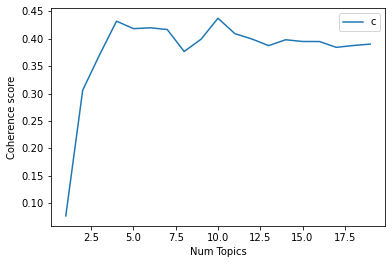

In [34]:
# Show graph
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [35]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 1  has Coherence Value of 0.0771
Num Topics = 2  has Coherence Value of 0.3061
Num Topics = 3  has Coherence Value of 0.3707
Num Topics = 4  has Coherence Value of 0.4318
Num Topics = 5  has Coherence Value of 0.4182
Num Topics = 6  has Coherence Value of 0.4197
Num Topics = 7  has Coherence Value of 0.4166
Num Topics = 8  has Coherence Value of 0.3765
Num Topics = 9  has Coherence Value of 0.3989
Num Topics = 10  has Coherence Value of 0.4371
Num Topics = 11  has Coherence Value of 0.4091
Num Topics = 12  has Coherence Value of 0.3994
Num Topics = 13  has Coherence Value of 0.3873
Num Topics = 14  has Coherence Value of 0.398
Num Topics = 15  has Coherence Value of 0.3948
Num Topics = 16  has Coherence Value of 0.3947
Num Topics = 17  has Coherence Value of 0.3841
Num Topics = 18  has Coherence Value of 0.3875
Num Topics = 19  has Coherence Value of 0.39


In [36]:
# Select the model and print the topics
optimal_model = model_list[3]


In [37]:
model_topics = optimal_model.show_topics(formatted=False)
model_topics


[(0,
  [('drive', 0.05728359025814102),
   ('amp', 0.023077624737754265),
   ('level', 0.022895192921645536),
   ('3', 0.018060749794764207),
   ('2', 0.01751345434643802),
   ('tsla', 0.01733102253032929),
   ('musk', 0.0167837270820031),
   ('elon', 0.015233056645078902),
   ('year', 0.013317522575937244),
   ('mile', 0.012770227127611056)]),
 (1,
  [('driver', 0.0631616723488247),
   ('vehicl', 0.05715054728153598),
   ('system', 0.05284406962138884),
   ('featur', 0.029337879059752377),
   ('crash', 0.02628745738381482),
   ('semi', 0.02296788085411807),
   ('peopl', 0.019020276332316528),
   ('assist', 0.01794365691727974),
   ('safeti', 0.016149291225551768),
   ('model', 0.015790418087206173)]),
 (2,
  [('drive', 0.07041372531498526),
   ('car', 0.0452149048342418),
   ('fulli', 0.03359842730765794),
   ('fsd', 0.025377535519613977),
   ('road', 0.020730944508980432),
   ('make', 0.02055222947010991),
   ('full', 0.017692788848181575),
   ('time', 0.016173711017782148),
   ('sof

In [38]:
pprint(optimal_model.print_topics(num_words=10))


[(0,
  '0.057*"drive" + 0.023*"amp" + 0.023*"level" + 0.018*"3" + 0.018*"2" + '
  '0.017*"tsla" + 0.017*"musk" + 0.015*"elon" + 0.013*"year" + 0.013*"mile"'),
 (1,
  '0.063*"driver" + 0.057*"vehicl" + 0.053*"system" + 0.029*"featur" + '
  '0.026*"crash" + 0.023*"semi" + 0.019*"peopl" + 0.018*"assist" + '
  '0.016*"safeti" + 0.016*"model"'),
 (2,
  '0.070*"drive" + 0.045*"car" + 0.034*"fulli" + 0.025*"fsd" + 0.021*"road" + '
  '0.021*"make" + 0.018*"full" + 0.016*"time" + 0.014*"softwar" + '
  '0.012*"compani"'),
 (3,
  '0.032*"car" + 0.031*"robot" + 0.028*"ai" + 0.027*"startup" + '
  '0.022*"selfdriv" + 0.021*"tech" + 0.020*"selfdrivingcar" + '
  '0.020*"technolog" + 0.020*"autonomousvehicl" + 0.019*"driverless"')]


In [39]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.3031,"drive, car, fulli, fsd, road, make, full, time...","[fsd, packag, sell, defin, featur, includ, rob..."
1,1,2.0,0.2726,"drive, car, fulli, fsd, road, make, full, time...","[never, said, car, case, end, favor]"
2,2,0.0,0.2500,"drive, amp, level, 3, 2, tsla, musk, elon, yea...",[]
3,3,1.0,0.2983,"driver, vehicl, system, featur, crash, semi, p...","[competitor, close, tmc, member, compar, drive..."
4,4,2.0,0.3043,"drive, car, fulli, fsd, road, make, full, time...","[lot, cult, member, make, way, giga, austin, p..."
5,5,2.0,0.3033,"drive, car, fulli, fsd, road, make, full, time...","[autonomi, greatest, boon, safeti, vehicl, fol..."
6,6,2.0,0.3104,"drive, car, fulli, fsd, road, make, full, time...","[polic, set, probe, singaporean, coupl, drive,..."
7,7,2.0,0.3404,"drive, car, fulli, fsd, road, make, full, time...","[full, self, drive, beta, two, differ, thing, ..."
8,8,0.0,0.3174,"drive, amp, level, 3, 2, tsla, musk, elon, yea...","[mark, calendar, april, 7, 10, 15, 12, 00, roo..."
9,9,0.0,0.2803,"drive, amp, level, 3, 2, tsla, musk, elon, yea...","[show, auto, pilot, commerci, mi, sure, countr..."


In [40]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4562,"drive, amp, level, 3, 2, tsla, musk, elon, yea...","[thirdrowtesla, fals, equival, amp, manipul, f..."
1,1.0,0.4357,"driver, vehicl, system, featur, crash, semi, p...","[let, driver, reli, much, autom, design, flaw,..."
2,2.0,0.4028,"drive, car, fulli, fsd, road, make, full, time...","[german, court, ban, germani, includ, full, po..."
3,3.0,0.4848,"car, robot, ai, startup, selfdriv, tech, selfd...","[owner, dog, goe, hilari, joy, ride, selfdrivi..."


In [41]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().reset_index(drop=True)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

df_dominant_topics.sort_values(by="Dominant_Topic", ascending=True, inplace=True)
# Show
df_dominant_topics


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
1.0,0.0,"drive, amp, level, 3, 2, tsla, musk, elon, yea...",791,0.2720
2.0,1.0,"driver, vehicl, system, featur, crash, semi, p...",812,0.2792
0.0,2.0,"drive, car, fulli, fsd, road, make, full, time...",727,0.2500
3.0,3.0,"car, robot, ai, startup, selfdriv, tech, selfd...",578,0.1988


In [42]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.3031,"drive, car, fulli, fsd, road, make, full, time...","[fsd, packag, sell, defin, featur, includ, rob..."
1,1,2.0,0.2726,"drive, car, fulli, fsd, road, make, full, time...","[never, said, car, case, end, favor]"
2,2,0.0,0.2500,"drive, amp, level, 3, 2, tsla, musk, elon, yea...",[]
3,3,1.0,0.2983,"driver, vehicl, system, featur, crash, semi, p...","[competitor, close, tmc, member, compar, drive..."
4,4,2.0,0.3043,"drive, car, fulli, fsd, road, make, full, time...","[lot, cult, member, make, way, giga, austin, p..."
...,...,...,...,...,...
2903,2903,2.0,0.2728,"drive, car, fulli, fsd, road, make, full, time...","[last, place, autonomi, show, tech, progress, ..."
2904,2904,2.0,0.3126,"drive, car, fulli, fsd, road, make, full, time...","[avail, owner, shell, 3k, enhanc, 8k, full, se..."
2905,2905,2.0,0.2949,"drive, car, fulli, fsd, road, make, full, time...","[addit, ad, automat, lane, chang, without, use..."
2906,2906,0.0,0.3148,"drive, amp, level, 3, 2, tsla, musk, elon, yea...","[elon, musk, let, us, know, earlier, year, dri..."


In [43]:
for tp in range(len(model_list)):
    mydir = 'N1_LDA_mallet_without_3keywords/topic_'+str(tp+1)
    os.makedirs(mydir,exist_ok= True)
    optimal_model = model_list[tp]
    def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
        # Init output
        sent_topics_df = pd.DataFrame()

        # Get main topic in each document
        for i, row in enumerate(ldamodel[corpus]):
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            # Get the Dominant topic, Perc Contribution and Keywords for each document
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:  # => dominant topic
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

        # Add original text to the end of the output
        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
        return(sent_topics_df)


    df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts)

    # Format
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    
    df_dominant_topic['full_text'] = df['full_text'].values
    df_dominant_topic['full_text_cleaned'] = df['full_text_cleaned'].values
    df_dominant_topic['scores_sum'] = df['scores_sum'].values
    df_dominant_topic['sentences'] = df['sentences'].values
    df_dominant_topic['scores'] = df['scores'].values
    # Show
    df_dominant_topic.to_csv(mydir+'/topics_sentences.csv')
    
    
    
    
    df_dominant_topic = df_dominant_topic[df_dominant_topic['scores_sum'] != 0]

#     df_dominant_topic['sentiment_score'] = df_dominant_topic['sentiment'].apply(lambda x: 0 if x == 'neg' else 1)

    df_topic_sentiment = pd.DataFrame(df_dominant_topic.groupby(['Dominant_Topic'])['scores_sum'].mean())

    
    df_dominant_topic['sentiment'] = df_dominant_topic['scores_sum'].apply(lambda x:'pos' if x >0 else 'neg')
    
    df_topic_sentiment['pos_num'] = df_dominant_topic.groupby(['Dominant_Topic'])['sentiment'].value_counts().unstack()['pos']
    df_topic_sentiment['neg_num'] = df_dominant_topic.groupby(['Dominant_Topic'])['sentiment'].value_counts().unstack()['neg']


    df_topic_sentiment.index = range(1,len(df_dominant_topic['Dominant_Topic'].unique())+1)
    df_topic_sentiment.index.set_names (['Dominant_Topic'],inplace = True)

    df_topic_sentiment.to_csv(mydir+'/topics_sentiment.csv')


    plt.style.use('ggplot')
    fig = plt.figure(figsize=(15,7))
    axes = fig.subplots(nrows=1, ncols=2)
    ax1, ax2 = axes.ravel()

    df_topic_sentiment[['scores_sum']].plot.bar(color = 'purple',ax=ax1,title = 'average of sentiment score',rot = 0)

    df_topic_sentiment[['pos_num','neg_num']].plot.bar(ax=ax2,title = 'sentiment distribution by amount',rot = 0)

    fig.subplots_adjust(left=0.05, bottom=0.2, right=0.95,
                        top=0.95, hspace=0.1, wspace=0.3) 

    plt.savefig(mydir+'/plot_topic_num_'+str(len(df_topic_sentiment.index)))
    plt.close()








    sent_topics_sorteddf_mallet = pd.DataFrame()

    sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                 grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                                axis=0)

    # Reset Index    
    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

    # Show
    sent_topics_sorteddf_mallet.to_csv(mydir+'/topics_represent_sentences.csv')






    # Number of Documents for Each Topic
    topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

    # Percentage of Documents for Each Topic
    topic_contribution = round(topic_counts/topic_counts.sum(), 4)

    # Topic Number and Keywords
    topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().reset_index(drop=True)

    # Concatenate Column wise
    df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

    # Change Column names
    df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

    df_dominant_topics.sort_values(by="Dominant_Topic", ascending=True, inplace=True)
    # Show
    df_dominant_topics.to_csv(mydir+'/topics_sentences_num.csv')
    
    
    
    
    
    
    
    optimal_model.save(mydir+'/lda_mallet.model')
    


In [44]:
for tph in range(1,len(model_list)):
    mydir = 'N1_LDA_mallet_without_3keywords/topic_'+str(tph+1)
    pyLDAvis.enable_notebook()
    # vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    vis = pyLDAvis.gensim_models.prepare(gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_list[tph]), corpus, id2word) 
    pyLDAvis.save_html(vis,mydir+'/topic_new.html')

In [45]:
import numpy as np

np.save('N1_LDA_mallet_without_3keywords/model_list_stemming_without_3.npy',np.array(model_list))

In [46]:
# # Visualize the topics
# pyLDAvis.enable_notebook()
# # vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis16 = pyLDAvis.gensim_models.prepare(gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_list[15]), corpus, id2word)   # 根据版本信息选择
# vis16


In [61]:
df_topic_10 =pd.read_csv('/Users/zhangbowen/Desktop/media&info_3/BA Thesis/thesis coding material/N1_LDA_mallet_without_3keywords/topic_10/topics_sentences.csv')

In [60]:
df_10_topics.to_csv('topic_10.csv')

<AxesSubplot:>

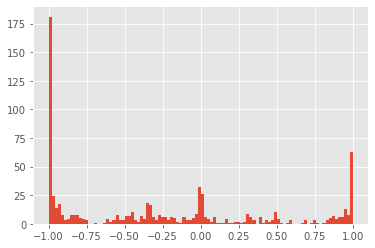

In [48]:
df_4_topics[df_4_topics['Dominant_Topic'] == 0]['scores_sum'].hist(bins = 100)

<AxesSubplot:>

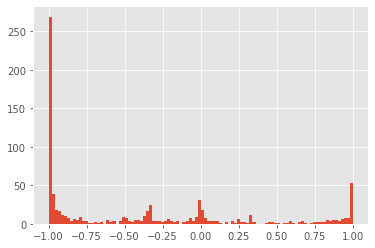

In [49]:
df_4_topics[df_4_topics['Dominant_Topic'] == 1]['scores_sum'].hist(bins = 100)

<AxesSubplot:>

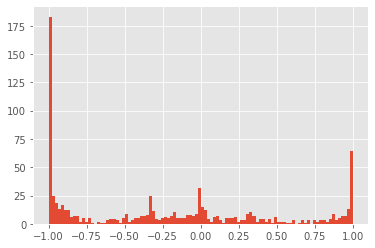

In [50]:
df_4_topics[df_4_topics['Dominant_Topic'] == 2]['scores_sum'].hist(bins = 100)

<AxesSubplot:>

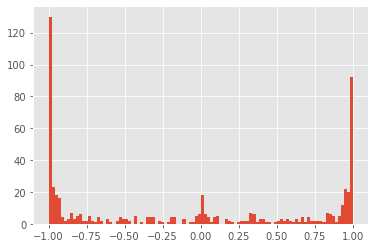

In [51]:
df_4_topics[df_4_topics['Dominant_Topic'] == 3]['scores_sum'].hist(bins = 100)

In [52]:
# # Visualize the topics
# pyLDAvis.enable_notebook()
# # vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis4 = pyLDAvis.gensim_models.prepare(gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_list[3]), corpus, id2word)   # 根据版本信息选择
# vis4


In [53]:
# import matplotlib.pyplot as plt
# import matplotlib

Text(0.5, 1.0, 'p-value between groups')

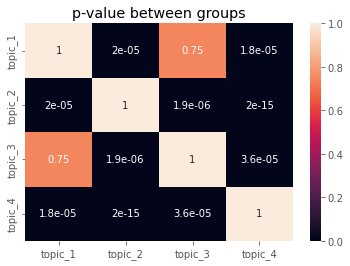

In [54]:
import numpy as np
from scipy import stats
import seaborn as sns
K = 4
list_review_cate = []
for i in range(K):
    list_review_cate.append(df_4_topics[df_4_topics['Dominant_Topic'] == i]['scores_sum'].values)
d = K
review_t = np.zeros([d,d])
for i in range(d):
    for j in range(i,d):
        review_t[i,j] = stats.ttest_ind(list_review_cate[i],list_review_cate[j], equal_var=False)[1]
        review_t[j,i] = review_t[i,j]
group_list = ['topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8']
ax = sns.heatmap(pd.DataFrame(review_t,columns=group_list[0:d],index=group_list[0:d]),annot=True)
ax.set_title('p-value between groups')

<AxesSubplot:>

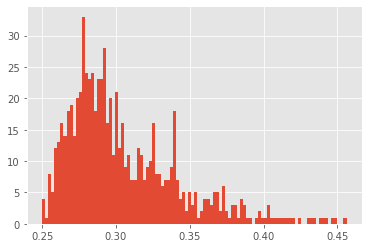

In [55]:
df_4_topics[df_4_topics['Dominant_Topic'] == 0 ]['Topic_Perc_Contrib'].hist(bins = 100)

<AxesSubplot:>

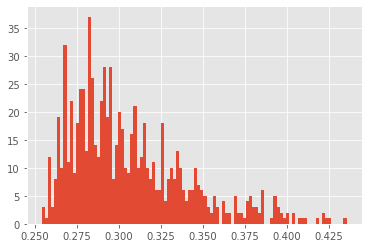

In [56]:
df_4_topics[df_4_topics['Dominant_Topic'] == 1 ]['Topic_Perc_Contrib'].hist(bins = 100)

<AxesSubplot:>

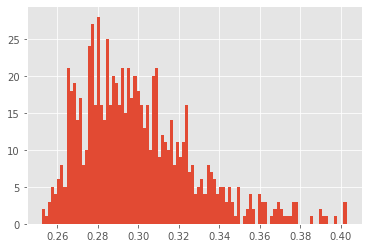

In [57]:
df_4_topics[df_4_topics['Dominant_Topic'] == 2 ]['Topic_Perc_Contrib'].hist(bins = 100)

<AxesSubplot:>

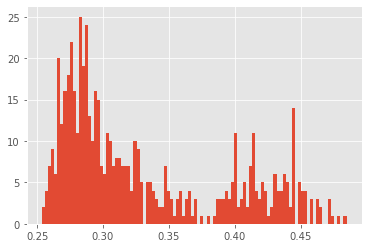

In [58]:
df_4_topics[df_4_topics['Dominant_Topic'] == 3 ]['Topic_Perc_Contrib'].hist(bins = 100)

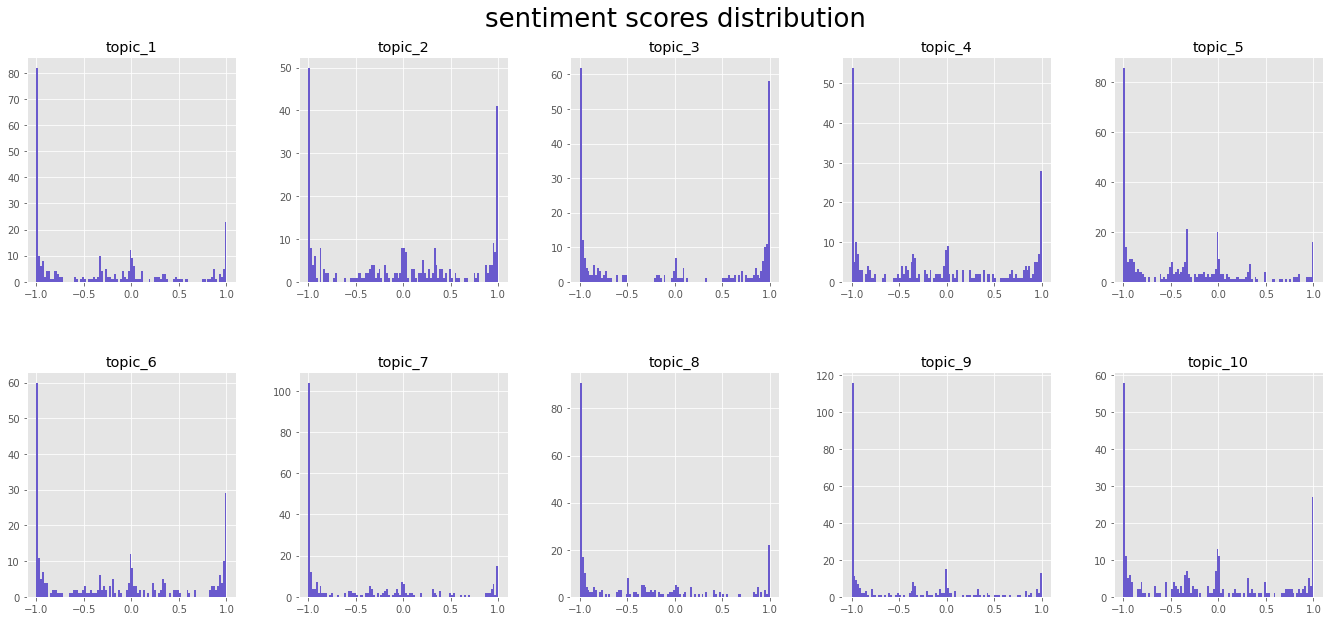

In [62]:
col = 'slateblue'
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
axes = fig.subplots(nrows=2, ncols=5)
ax1, ax2 ,ax3, ax4,ax5, ax6,ax7, ax8,ax9, ax10= axes.ravel()

# plt.title('sentiment scores distribution',x=10, y=0.98)

df_topic_10[df_topic_10['Dominant_Topic'] == 0][['scores_sum']].hist(bins = 100,ax = ax1,color = col)
ax1.set_title('topic_1')
df_topic_10[df_topic_10['Dominant_Topic'] == 1][['scores_sum']].hist(bins = 100,ax = ax2,color = col)
ax2.set_title('topic_2')
df_topic_10[df_topic_10['Dominant_Topic'] == 2][['scores_sum']].hist(bins = 100,ax = ax3,color = col)
ax3.set_title('topic_3')
df_topic_10[df_topic_10['Dominant_Topic'] == 3][['scores_sum']].hist(bins = 100,ax = ax4,color = col)
ax4.set_title('topic_4')
df_topic_10[df_topic_10['Dominant_Topic'] == 4][['scores_sum']].hist(bins = 100,ax = ax5,color = col)
ax5.set_title('topic_5')
df_topic_10[df_topic_10['Dominant_Topic'] == 5][['scores_sum']].hist(bins = 100,ax = ax6,color = col)
ax6.set_title('topic_6')
df_topic_10[df_topic_10['Dominant_Topic'] == 6][['scores_sum']].hist(bins = 100,ax = ax7,color = col)
ax7.set_title('topic_7')
df_topic_10[df_topic_10['Dominant_Topic'] == 7][['scores_sum']].hist(bins = 100,ax = ax8,color = col)
ax8.set_title('topic_8')
df_topic_10[df_topic_10['Dominant_Topic'] == 8][['scores_sum']].hist(bins = 100,ax = ax9,color = col)
ax9.set_title('topic_9')
df_topic_10[df_topic_10['Dominant_Topic'] == 9][['scores_sum']].hist(bins = 100,ax = ax10,color = col)
ax10.set_title('topic_10')

fig.suptitle('sentiment scores distribution',fontsize = 26,y= 1.02)

fig.subplots_adjust(left=0.05, bottom=0.2, right=0.95,
                    top=0.95, hspace=0.4, wspace=0.3) 


plt.show()

# plt.savefig(mydir+'/plot_topic_num_'+str(len(df_topic_sentiment.index)))
plt.close()




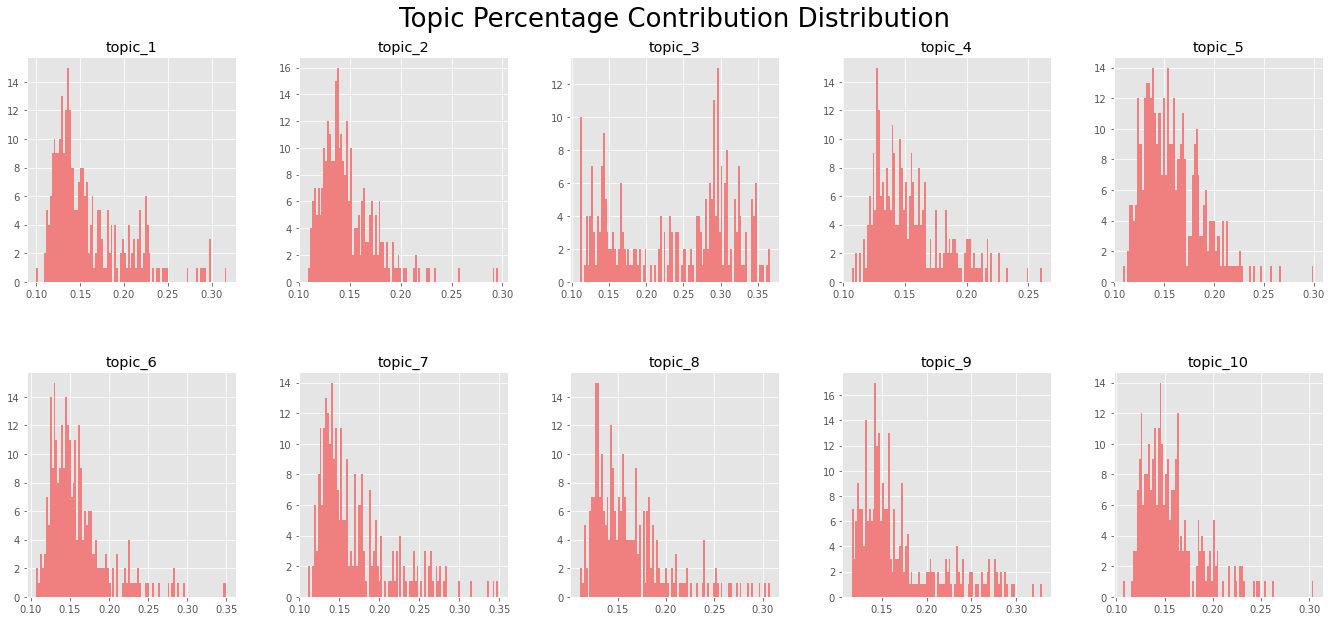

In [63]:
col = 'lightcoral'
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
axes = fig.subplots(nrows=2, ncols=5)
ax1, ax2 ,ax3, ax4,ax5, ax6,ax7, ax8,ax9, ax10= axes.ravel()

# plt.title('sentiment scores distribution',x=10, y=0.98)

df_topic_10[df_topic_10['Dominant_Topic'] == 0][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax1,color = col)
ax1.set_title('topic_1')
df_topic_10[df_topic_10['Dominant_Topic'] == 1][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax2,color = col)
ax2.set_title('topic_2')
df_topic_10[df_topic_10['Dominant_Topic'] == 2][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax3,color = col)
ax3.set_title('topic_3')
df_topic_10[df_topic_10['Dominant_Topic'] == 3][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax4,color = col)
ax4.set_title('topic_4')
df_topic_10[df_topic_10['Dominant_Topic'] == 4][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax5,color = col)
ax5.set_title('topic_5')
df_topic_10[df_topic_10['Dominant_Topic'] == 5][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax6,color = col)
ax6.set_title('topic_6')
df_topic_10[df_topic_10['Dominant_Topic'] == 6][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax7,color = col)
ax7.set_title('topic_7')
df_topic_10[df_topic_10['Dominant_Topic'] == 7][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax8,color = col)
ax8.set_title('topic_8')
df_topic_10[df_topic_10['Dominant_Topic'] == 8][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax9,color = col)
ax9.set_title('topic_9')
df_topic_10[df_topic_10['Dominant_Topic'] == 9][['Topic_Perc_Contrib']].hist(bins = 100,ax = ax10,color = col)
ax10.set_title('topic_10')

fig.suptitle('Topic Percentage Contribution Distribution',fontsize = 26,y= 1.02)

fig.subplots_adjust(left=0.05, bottom=0.2, right=0.95,
                    top=0.95, hspace=0.4, wspace=0.3) 


plt.show()

plt.savefig(mydir+'/plot_topic_num_'+str(len(df_topic_sentiment.index)))
plt.close()

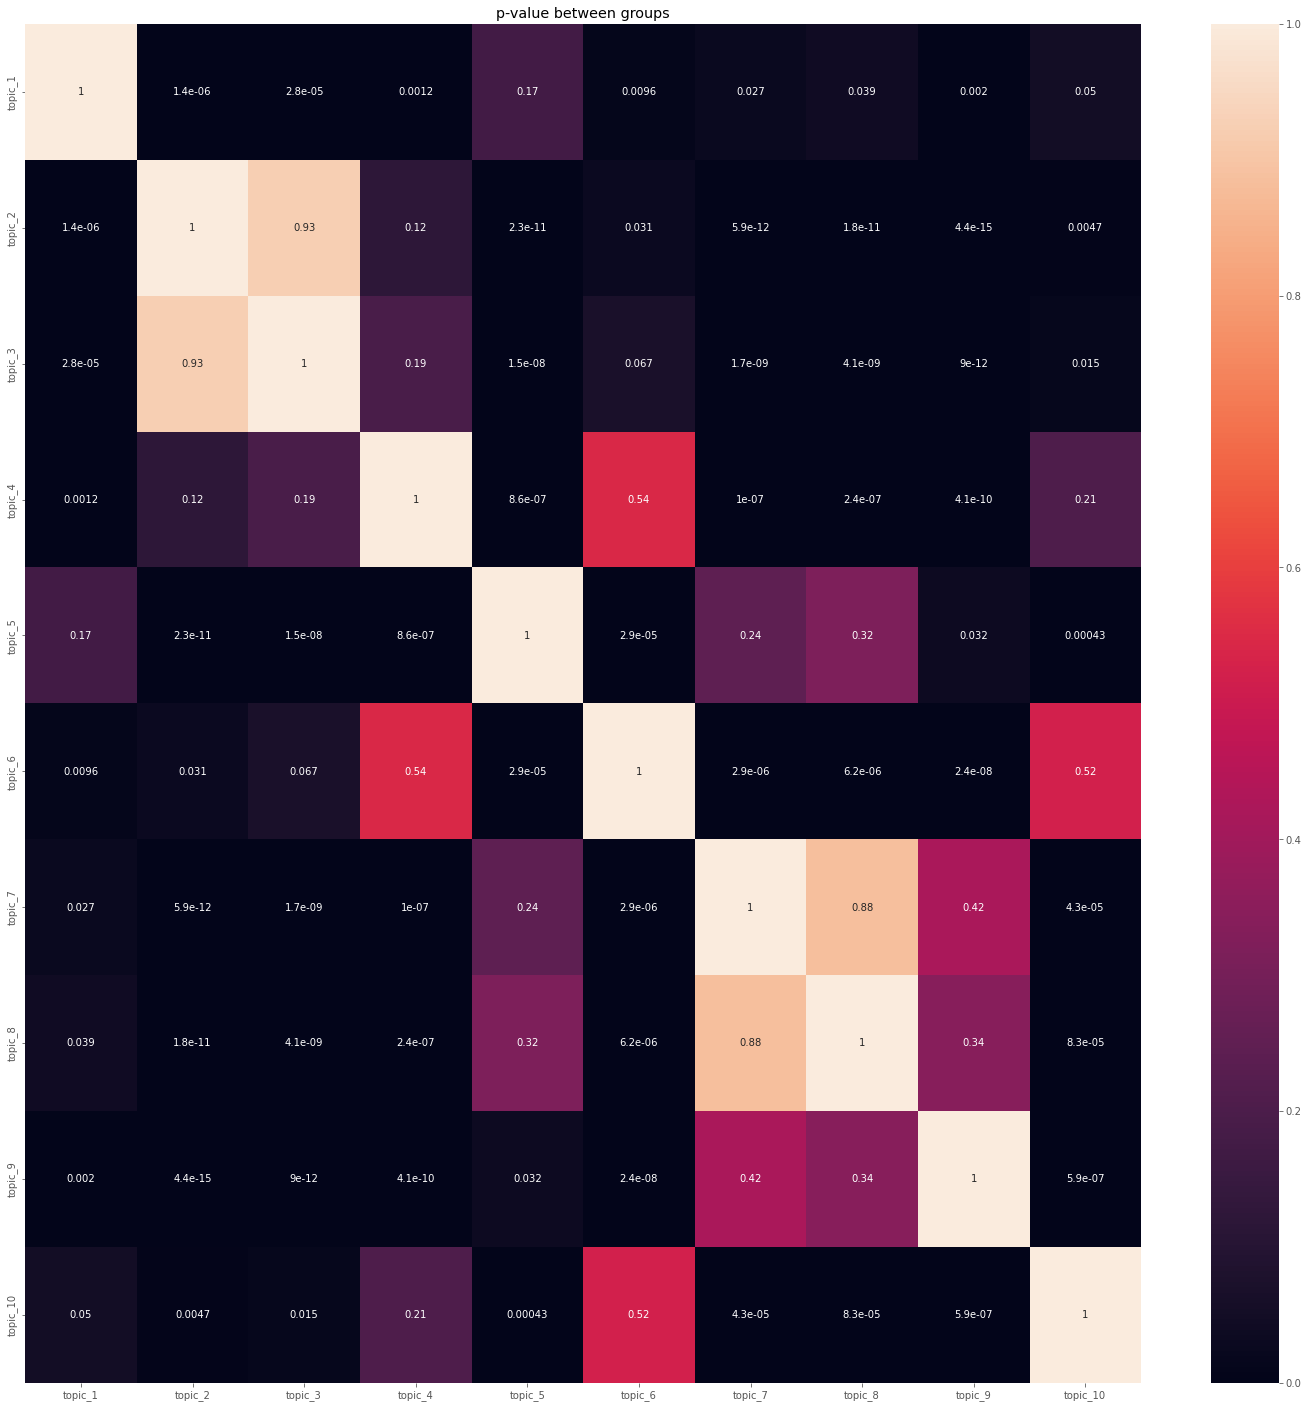

In [64]:
K = 10
list_review_cate = []
for i in range(K):
    list_review_cate.append(df_topic_10[df_topic_10['Dominant_Topic'] == i]['scores_sum'].values)
d = K
review_t = np.zeros([d,d])
for i in range(d):
    for j in range(i,d):
        review_t[i,j] = stats.ttest_ind(list_review_cate[i],list_review_cate[j], equal_var=False)[1]
        review_t[j,i] = review_t[i,j]
plt.figure(figsize=(25, 25))
group_list = ['topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9','topic_10']
ax = sns.heatmap(pd.DataFrame(review_t,columns=group_list[0:d],index=group_list[0:d]),annot=True)
ax.set_title('p-value between groups')
plt.show()
plt.close()